In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the datasets
startups_df = pd.read_csv("C:/Users/Tanner/OneDrive/Documents/School_Work/Capstone/World_startups.csv")
zigzag_df = pd.read_csv("C:/Users/Tanner/OneDrive/Documents/School_Work/Capstone/2024-04-24_zig_analytics.csv")

# Define a function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
        return text  # Handle NaN values or non-string data
    # Implement any necessary preprocessing steps below
    # For example, converting to lowercase
    return text.lower()

# Fill NaN values with empty strings before preprocessing
zigzag_df['idea_description'] = zigzag_df['idea_description'].fillna('')
startups_df['description'] = startups_df['description'].fillna('')

# Apply preprocessing to the text data
zigzag_df['idea_description'] = zigzag_df['idea_description'].apply(preprocess_text)
startups_df['description'] = startups_df['description'].apply(preprocess_text)

# Vectorize the descriptions using TF-IDF
vectorizer = TfidfVectorizer()
all_descriptions = pd.concat([zigzag_df['idea_description'], startups_df['description']], ignore_index=True)
tfidf_matrix = vectorizer.fit_transform(all_descriptions)

# Split the TF-IDF vectors back into Zigzag and World_startups sets
zigzag_vectors = tfidf_matrix[:len(zigzag_df)]
world_startups_vectors = tfidf_matrix[len(zigzag_df):]

# Calculate cosine similarity
similarities = cosine_similarity(zigzag_vectors, world_startups_vectors)

# Assign the closest industry_name, industry_id, and subindustry_name from World_startups to Zigzag
closest_inds = similarities.argmax(axis=1)
zigzag_df['assigned_industry_name'] = startups_df.iloc[closest_inds]['industry_name'].values
zigzag_df['assigned_industry_id'] = startups_df.iloc[closest_inds]['industry_id'].values
zigzag_df['assigned_subindustry_name'] = startups_df.iloc[closest_inds]['subindustry_name'].values

# Display the dataframe with the new assigned industry names, IDs, and subindustry names
print(zigzag_df[['idea_description', 'assigned_industry_name', 'assigned_industry_id', 'assigned_subindustry_name']])



C:\Users\Tanner\AppData\Local\Temp\ipykernel_24908\1201700769.py:6: DtypeWarning: Columns (25,26,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  startups_df = pd.read_csv("C:/Users/Tanner/OneDrive/Documents/School_Work/Capstone/World_startups.csv")


                                       idea_description  \
0     a business that does balloon animals for corpo...   
1     an organizer system that you install in handba...   
2     an integrated heart rate and lifestyle monitor...   
3     a business that allows you carve your company'...   
4     ai-generated template to optimize resumes to m...   
...                                                 ...   
8497  i want to sell whiteboards with decorative art...   
8498  a mobile health clinic is being launched to pr...   
8499  to start a clinic center for aba therapy servi...   
8500  a non-profit called entrepreneurs across borde...   
8501  a airbnb-like business that allows older peopl...   

     assigned_industry_name  assigned_industry_id assigned_subindustry_name  
0                Healthtech                     7               Health Care  
1           Software & Data                    10             Cybersecurity  
2        Ecommerce & Retail                     1  Ecomme

In [3]:
# Assuming zigzag_df is your final DataFrame after processing
zigzag_df.to_csv('IndustryZigzag.csv', index=False)


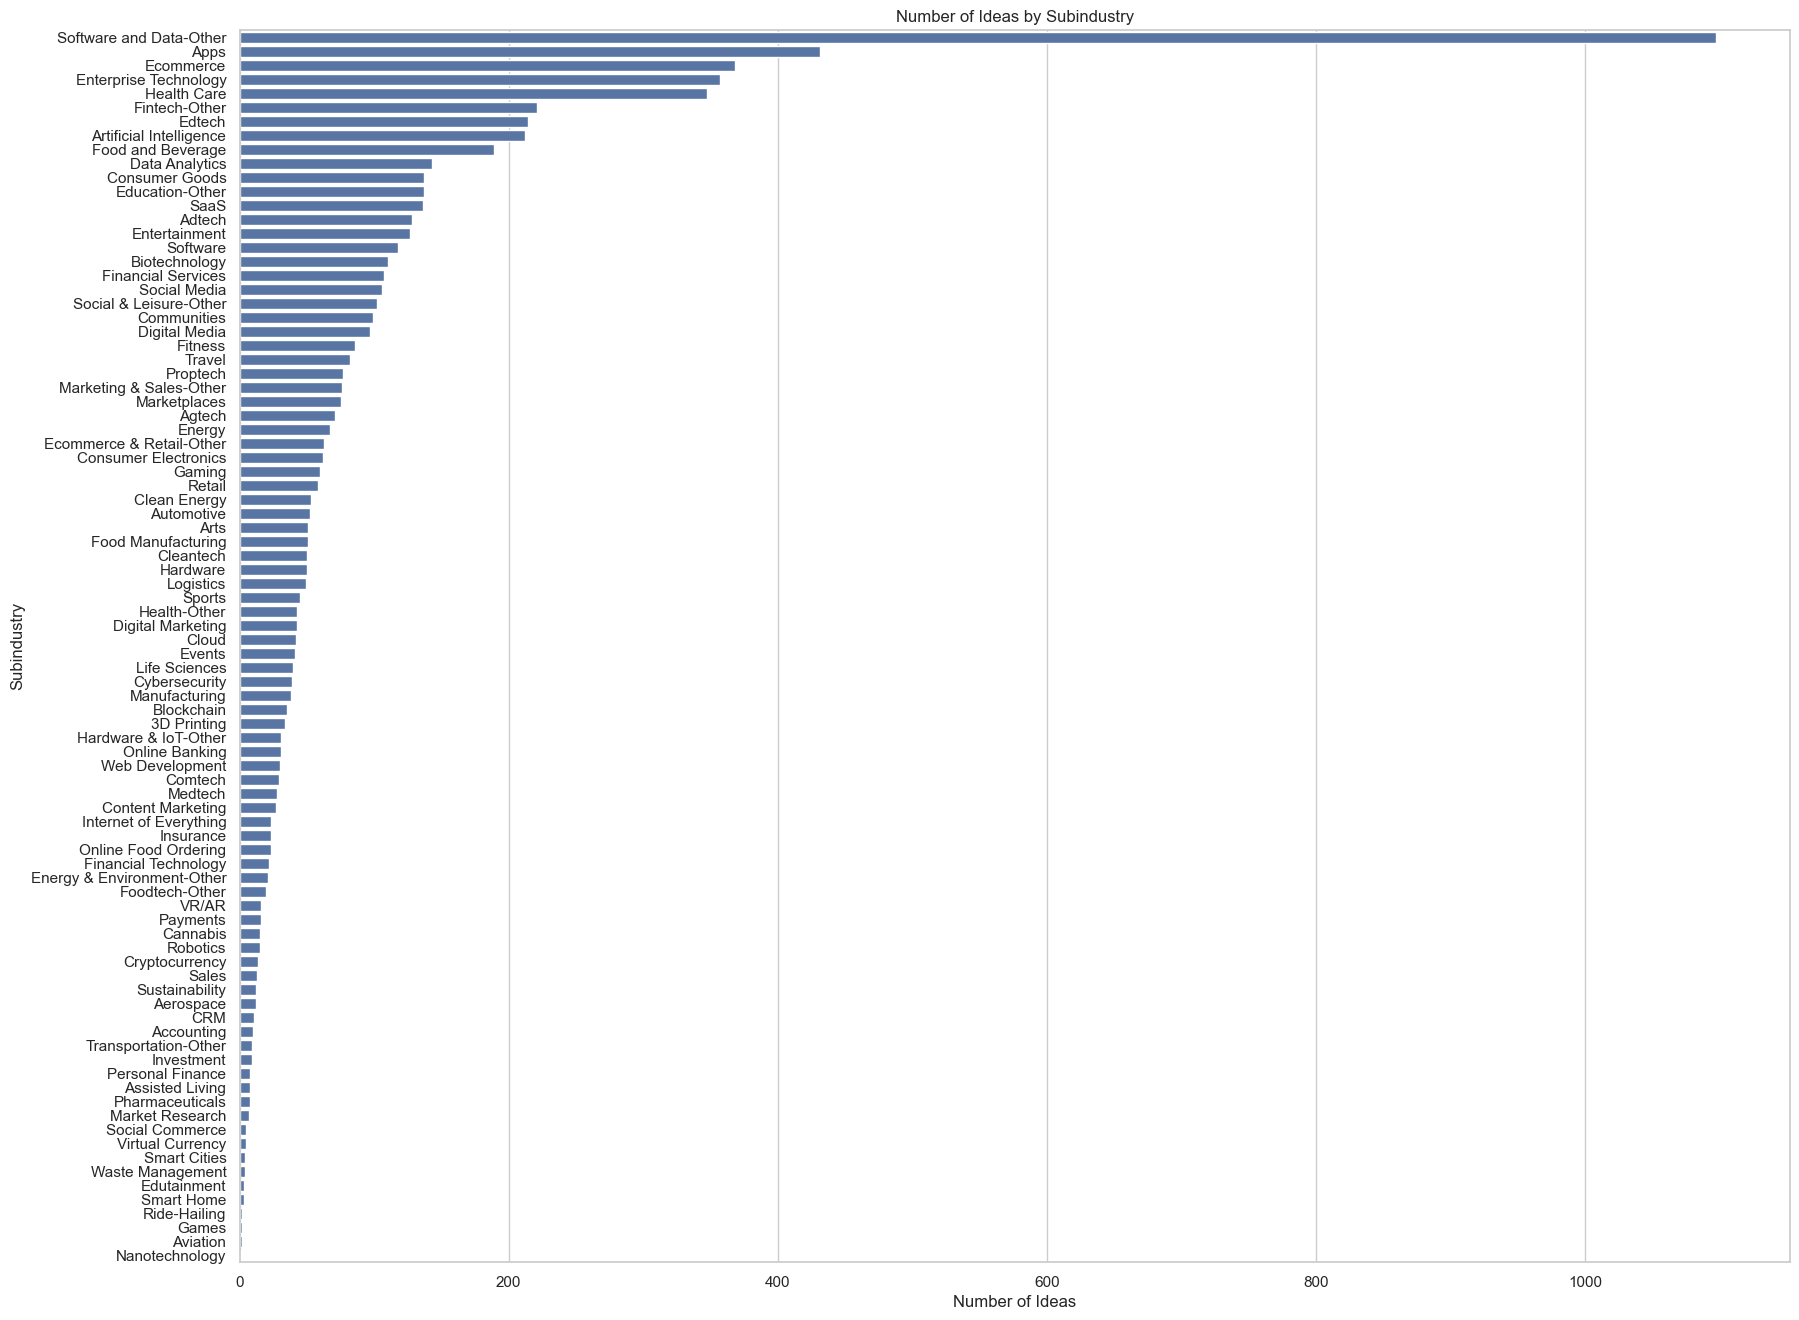

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming zigzag_df is your DataFrame after assigning subindustries
subindustry_counts = zigzag_df['assigned_subindustry_name'].value_counts()

plt.figure(figsize=(20, 16))
sns.barplot(x=subindustry_counts.values, y=subindustry_counts.index)
plt.title('Number of Ideas by Subindustry')
plt.xlabel('Number of Ideas')
plt.ylabel('Subindustry')
plt.show()


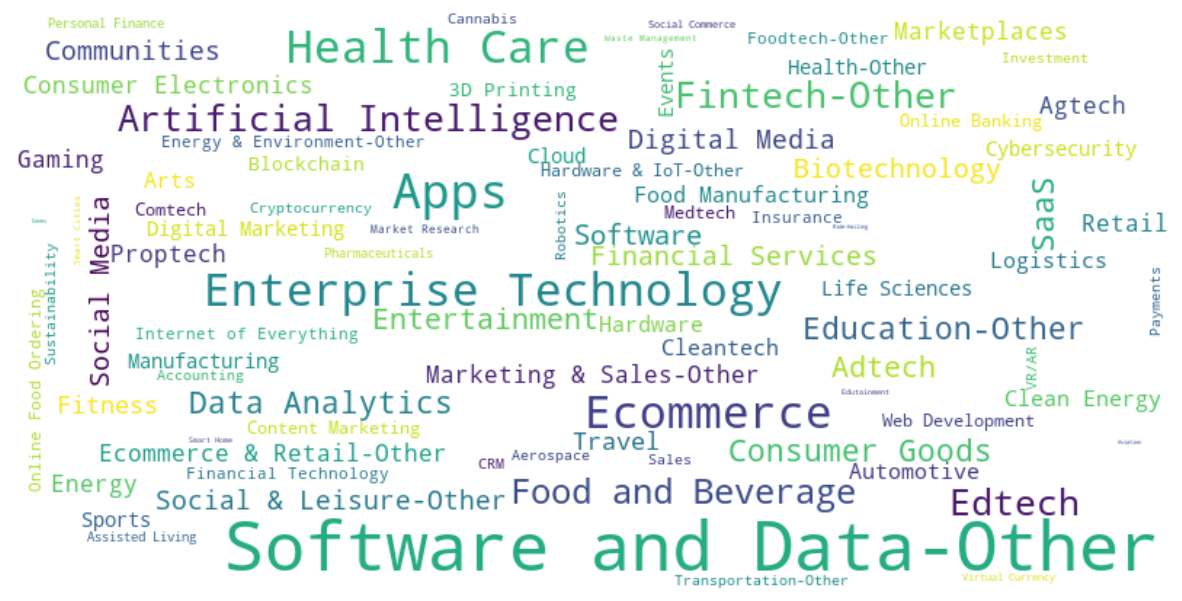

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(subindustry_counts)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


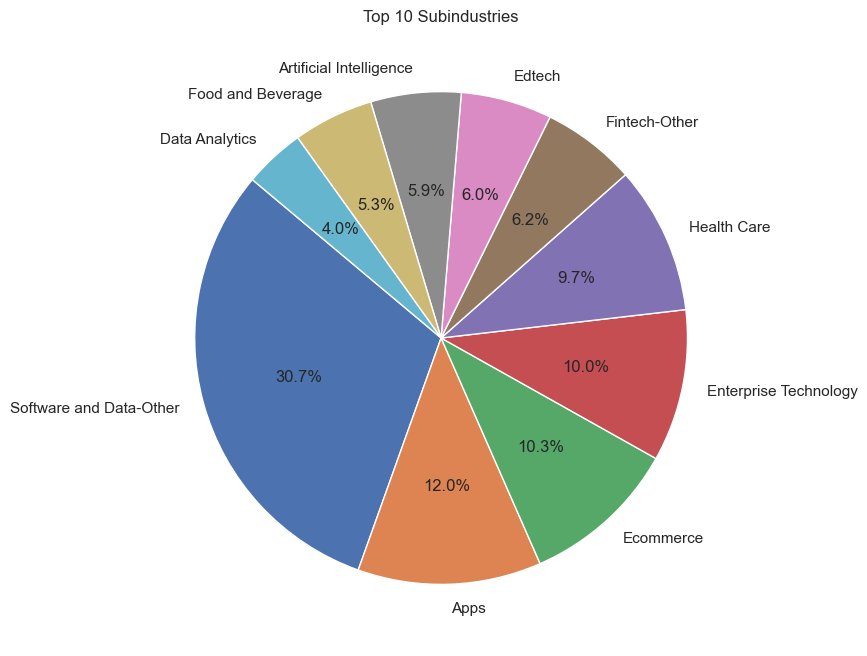

In [ ]:
top_n = 10  # Number of top subindustries to display
top_subindustries = subindustry_counts.head(top_n)

plt.figure(figsize=(10, 8))
top_subindustries.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Subindustries')
plt.ylabel('')  # Hide y-label as it's not informative here
plt.show()


/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16269/4017713679.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


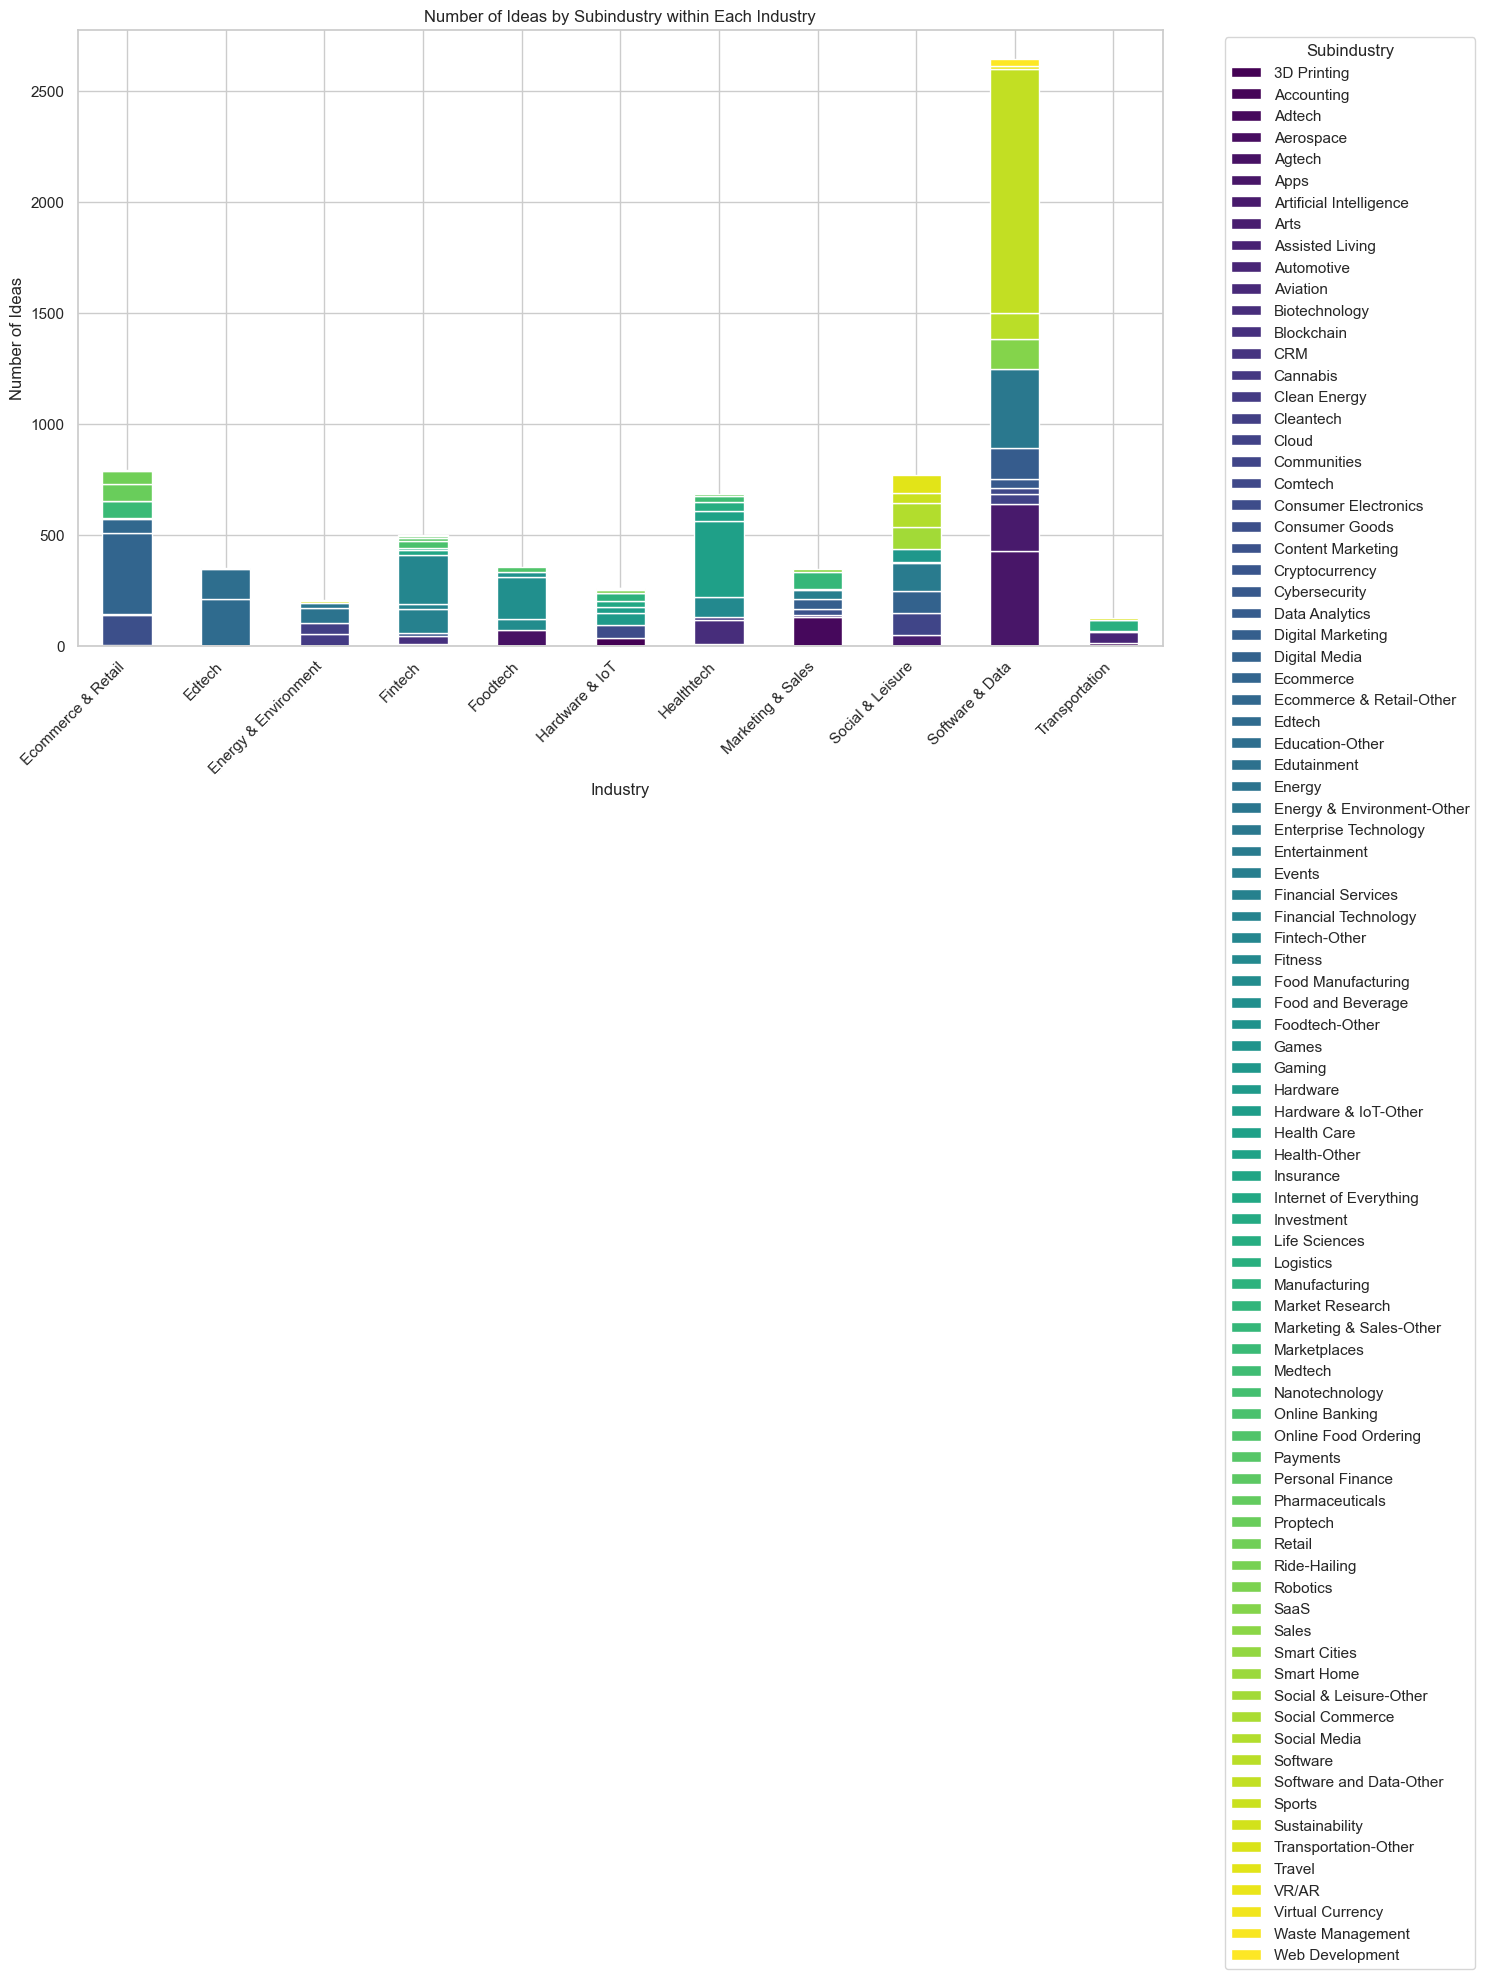

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'assigned_industry_name' and 'assigned_subindustry_name' are in your DataFrame
# First, create a grouped DataFrame
grouped_df = zigzag_df.groupby(['assigned_industry_name', 'assigned_subindustry_name']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Number of Ideas by Subindustry within Each Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Ideas')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Subindustry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



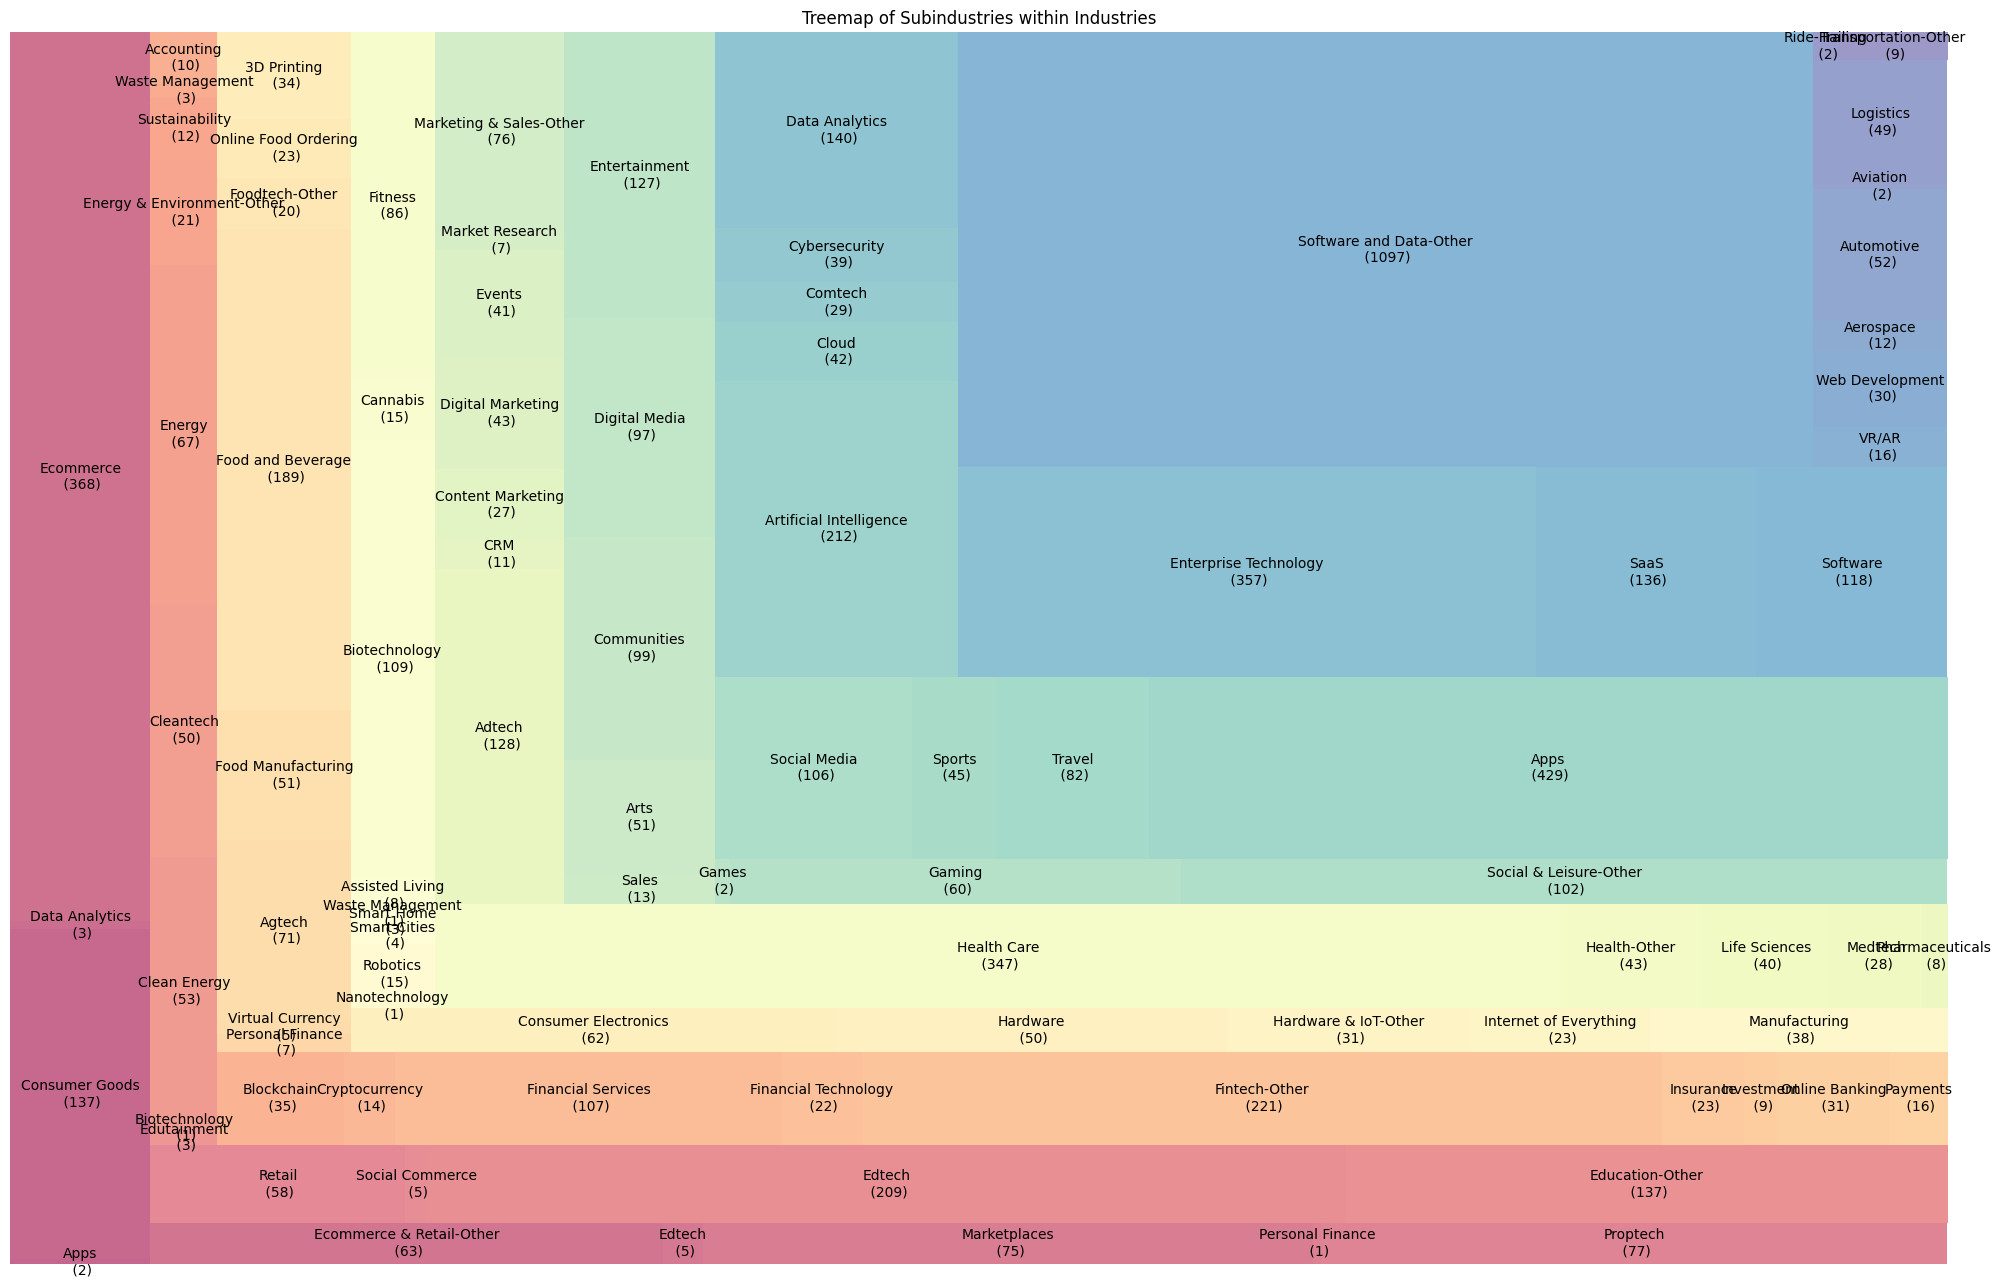

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Aggregate the data
agg_data = zigzag_df.groupby(['assigned_industry_name', 'assigned_subindustry_name']).size().reset_index(name='counts')

# Create a treemap
plt.figure(figsize=(25, 16))
labels = agg_data.apply(lambda x: f"{x['assigned_subindustry_name']}\n ({x['counts']})", axis=1)
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes=agg_data['counts'], label=labels, color=colors, alpha=0.6)
plt.title('Treemap of Subindustries within Industries')
plt.axis('off')
plt.show()


/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16269/1184819262.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")


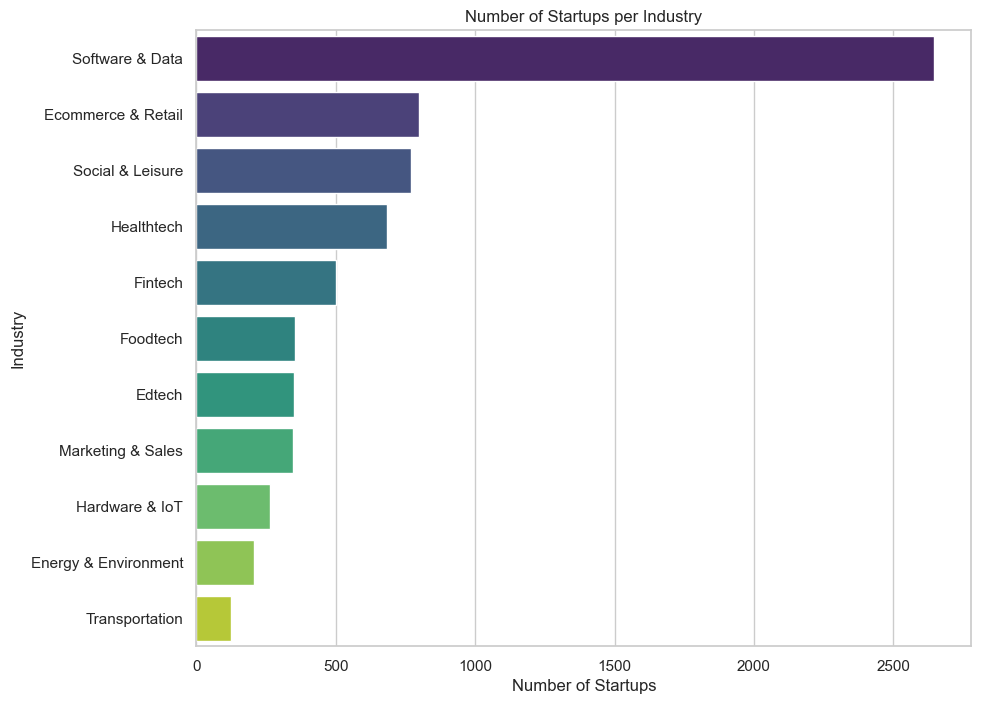

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame `combined_data` which is a combination of your data.
# Make sure you replace this with your actual DataFrame variable name.
# And assuming 'assigned_industry_name' is the column with industry names.

# First, we'll count the number of occurrences of each industry.
industry_counts = zigzag_df['assigned_industry_name'].value_counts()

# Now, let's make a simple bar chart.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")
plt.title('Number of Startups per Industry')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')
plt.show()


/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16269/4180710082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_grouped_sorted, y='assigned_industry_name', x='counts', palette="mako")


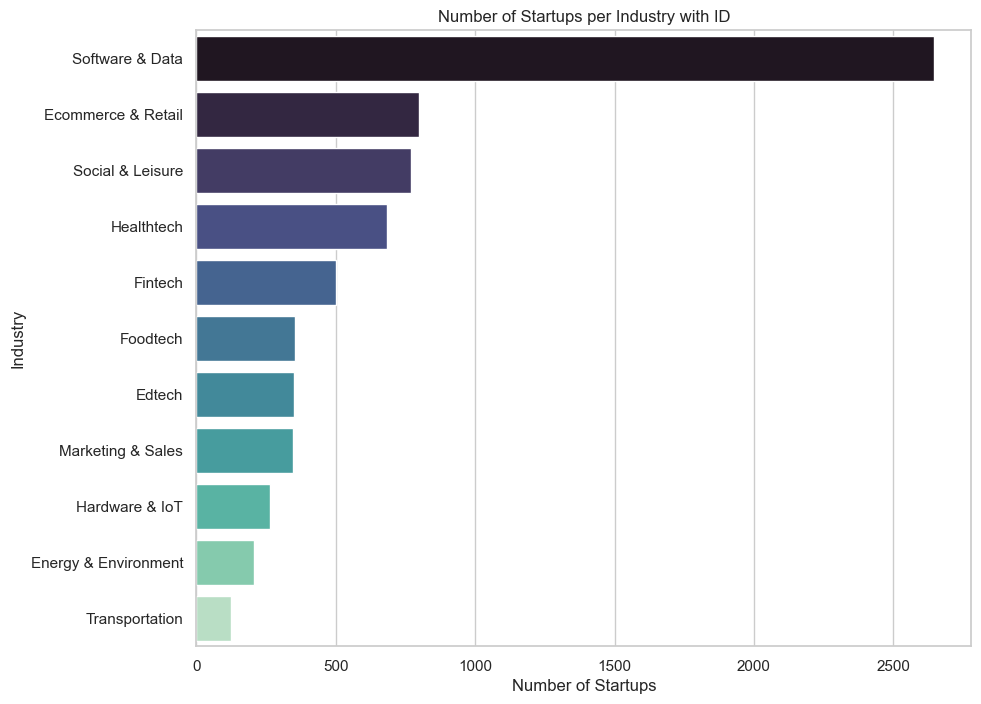

In [ ]:
# Group by both industry name and ID, then count
industry_grouped = zigzag_df.groupby(['assigned_industry_name', 'assigned_industry_id']).size().reset_index(name='counts')

# Sort the results for better visualization
industry_grouped_sorted = industry_grouped.sort_values('counts', ascending=False)

# Create a bar chart with the grouped data
plt.figure(figsize=(10, 8))
sns.barplot(data=industry_grouped_sorted, y='assigned_industry_name', x='counts', palette="mako")
plt.title('Number of Startups per Industry with ID')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')
plt.show()


/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16269/2463451785.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  zigzag_df.groupby('assigned_industry_name').resample('M').size().unstack('assigned_industry_name').plot()


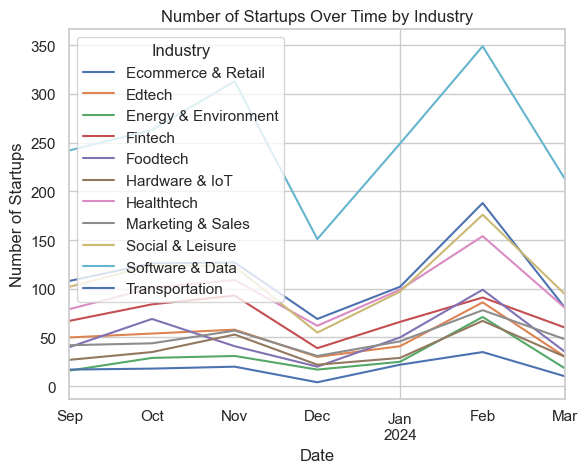

In [ ]:
zigzag_df['idea_created_at'] = pd.to_datetime(zigzag_df['idea_created_at'])
zigzag_df.set_index('idea_created_at', inplace=True)
zigzag_df.groupby('assigned_industry_name').resample('M').size().unstack('assigned_industry_name').plot()
plt.title('Number of Startups Over Time by Industry')
plt.ylabel('Number of Startups')
plt.xlabel('Date')
plt.legend(title='Industry')
plt.show()


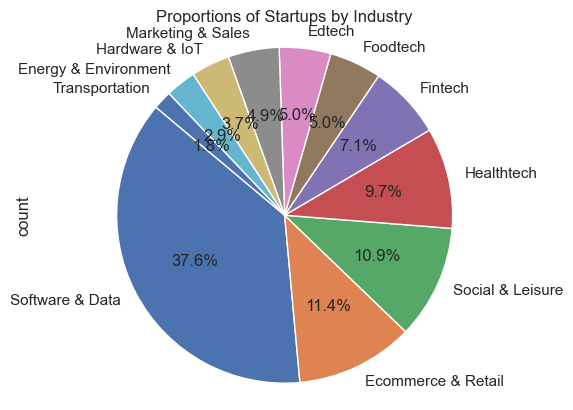

In [ ]:
industry_proportions = zigzag_df['assigned_industry_name'].value_counts()
industry_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportions of Startups by Industry')
plt.show()


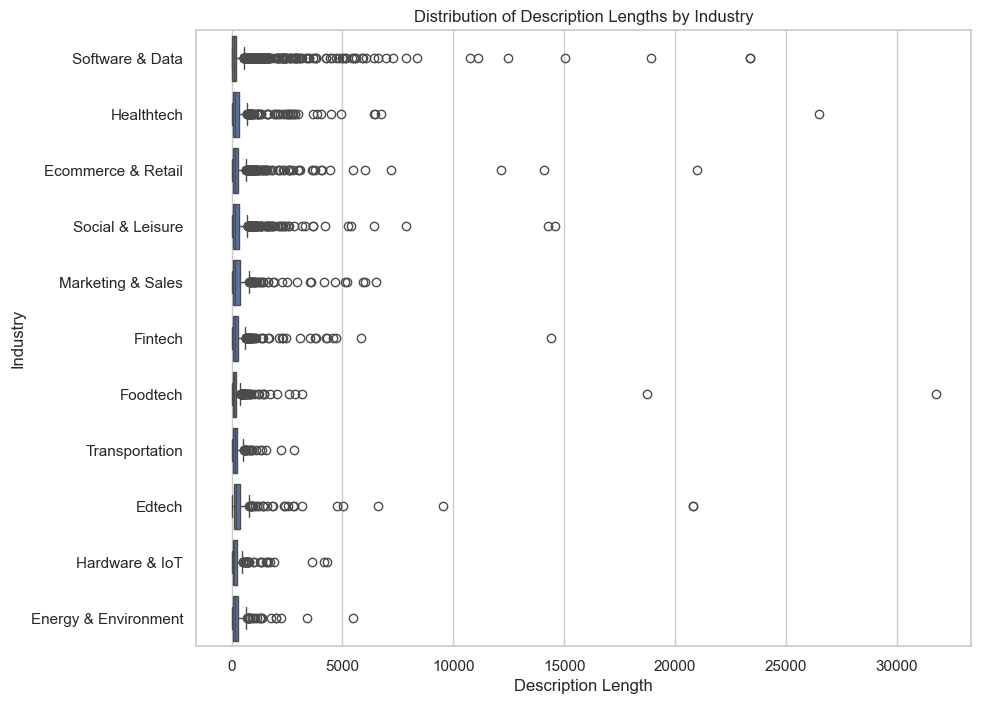

In [ ]:
zigzag_df['description_length'] = zigzag_df['idea_description'].apply(len)
plt.figure(figsize=(10, 8))
sns.boxplot(x='description_length', y='assigned_industry_name', data=zigzag_df)
plt.title('Distribution of Description Lengths by Industry')
plt.xlabel('Description Length')
plt.ylabel('Industry')
plt.show()


In [ ]:
# Group data by industry
industry_groups = zigzag_df.groupby('assigned_industry_name')


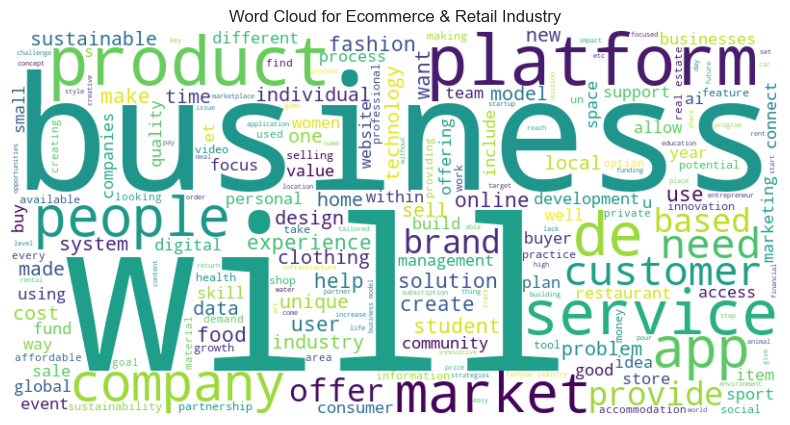

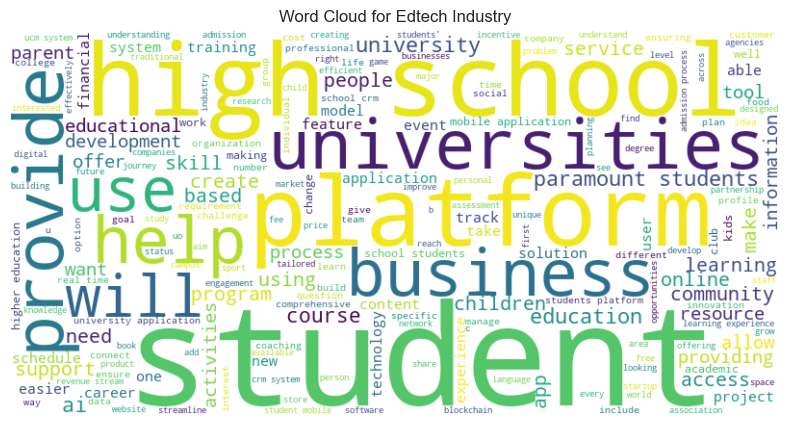

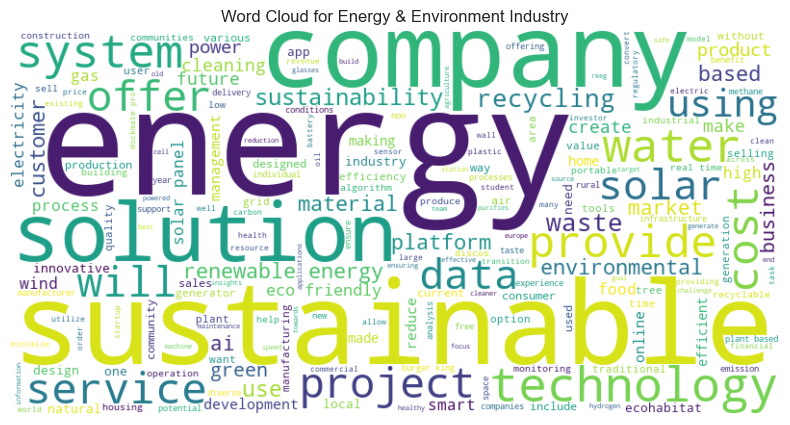

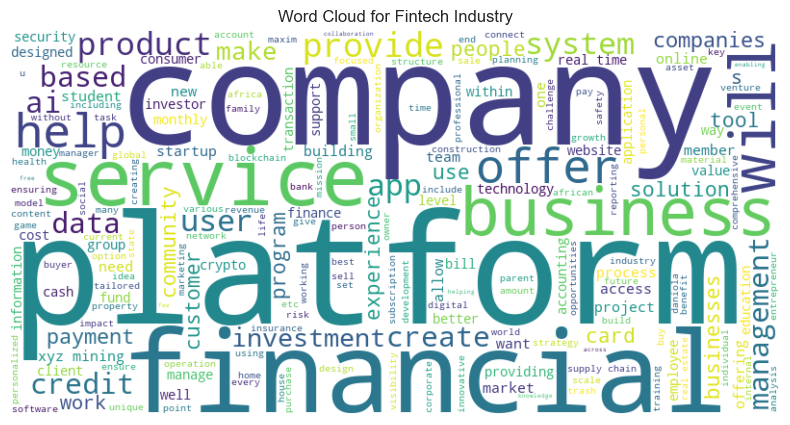

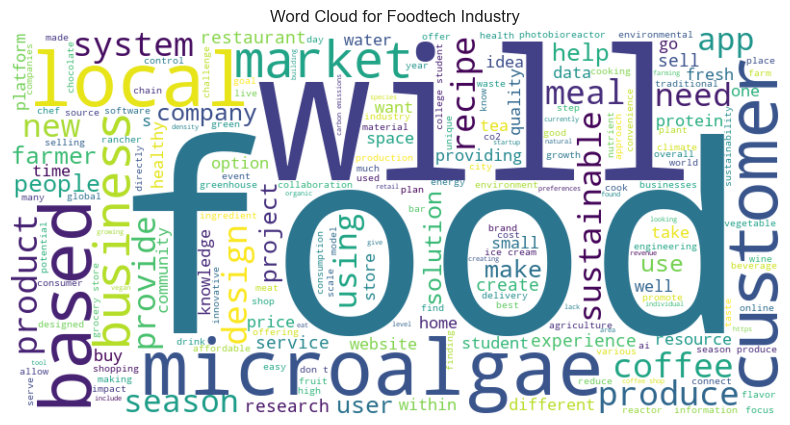

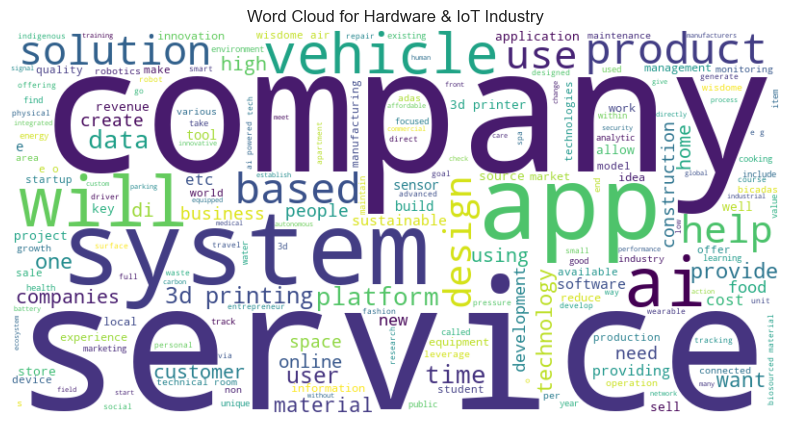

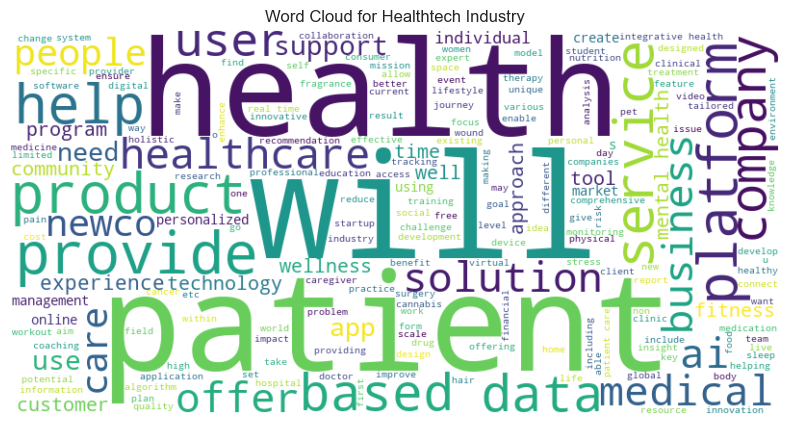

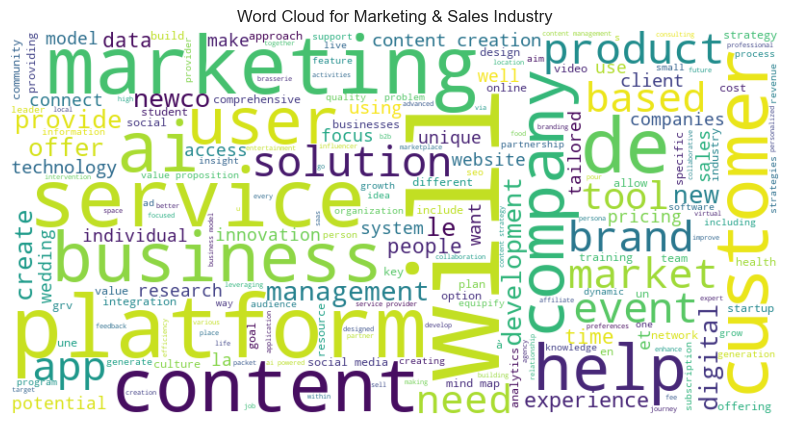

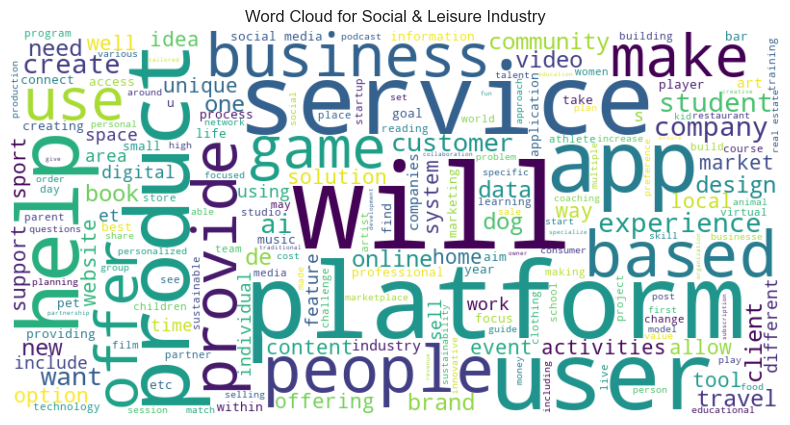

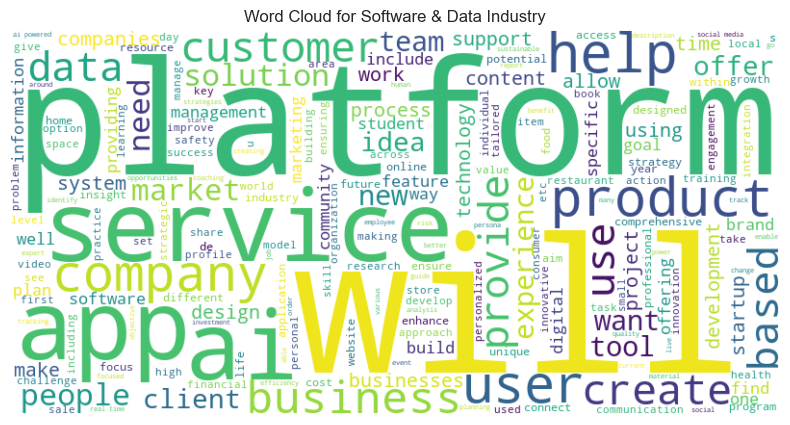

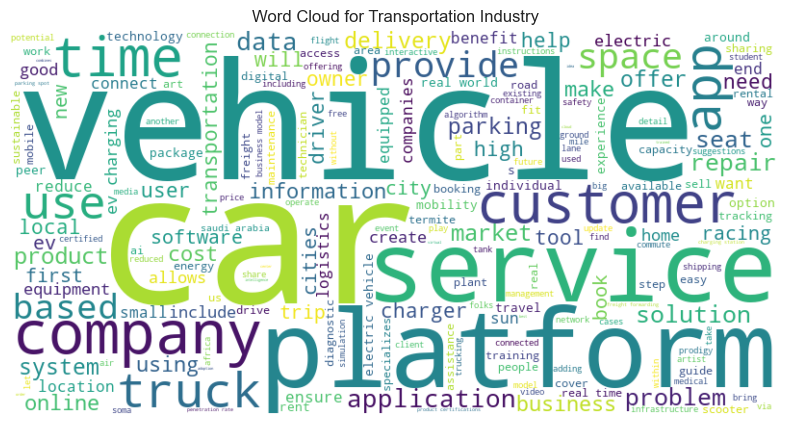

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `zigzag_df` is your DataFrame
for industry_name, group in zigzag_df.groupby('assigned_industry_name'):
    text = ' '.join(group['idea_description'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {industry_name} Industry')
    plt.axis('off')
    plt.show()


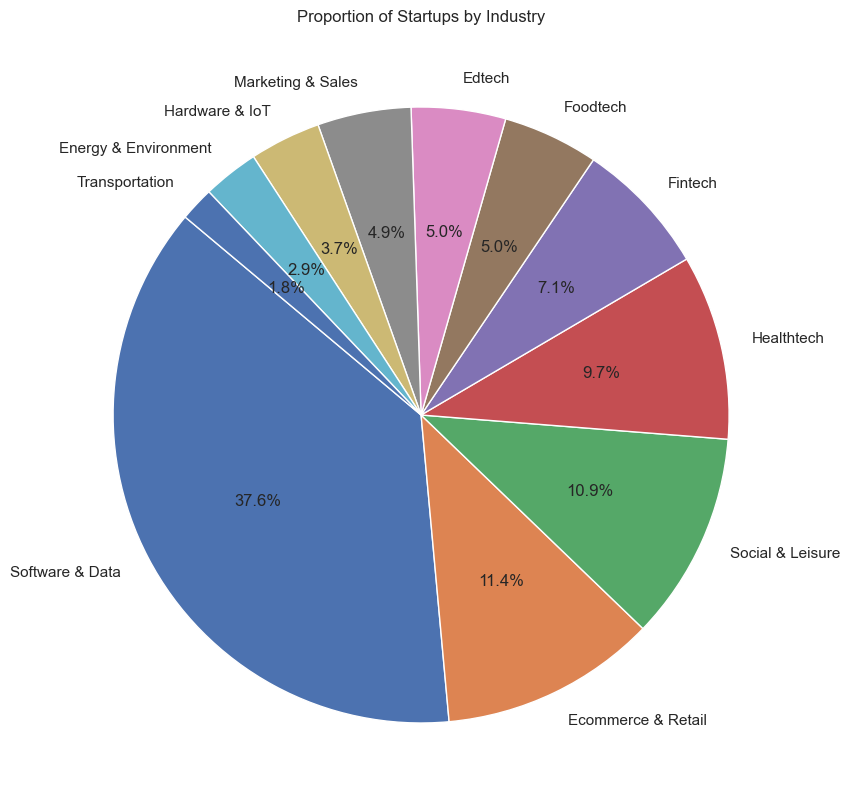

In [ ]:
industry_counts = zigzag_df['assigned_industry_name'].value_counts()
industry_counts.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Startups by Industry')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()


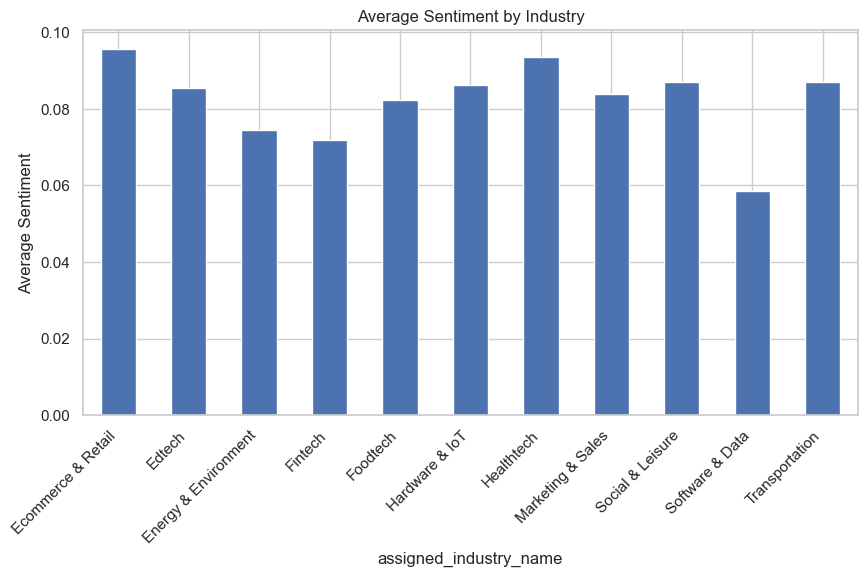

In [ ]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
zigzag_df['sentiment'] = zigzag_df['idea_description'].dropna().apply(calculate_sentiment)

# Aggregate average sentiment by industry
average_sentiment_by_industry = zigzag_df.groupby('assigned_industry_name')['sentiment'].mean()

# Plot
average_sentiment_by_industry.plot(kind='bar', figsize=(10, 5), title='Average Sentiment by Industry')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45, ha='right')
plt.show()


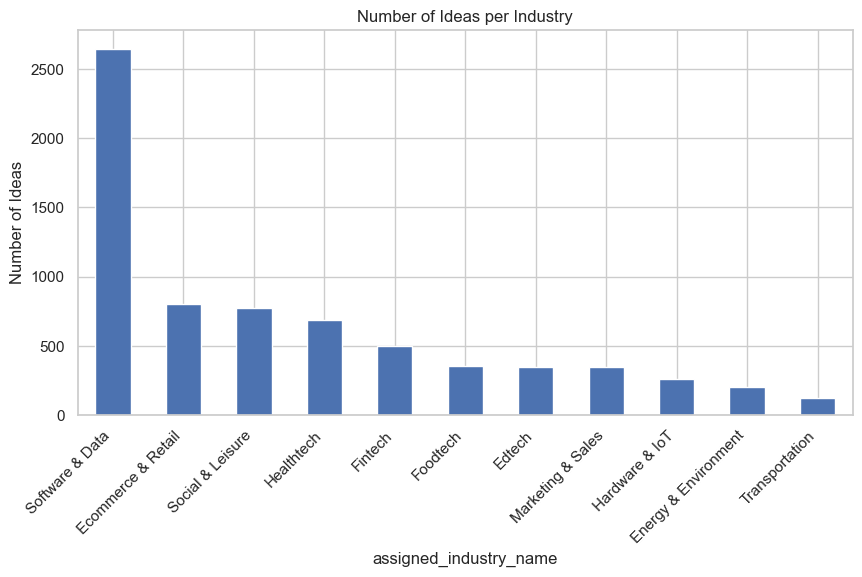

In [ ]:
industry_counts = zigzag_df['assigned_industry_name'].value_counts()
industry_counts.plot(kind='bar', figsize=(10, 5), title='Number of Ideas per Industry')
plt.ylabel('Number of Ideas')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Group by 'assigned_industry_name' and 'assigned_subindustry_name' and count the number of ideas
industry_subindustry_counts = zigzag_df.groupby(['assigned_industry_name', 'assigned_subindustry_name']).size()

# Reset index to turn the series into a dataframe and rename the columns appropriately
industry_subindustry_counts_df = industry_subindustry_counts.reset_index(name='Count')

# Sort the dataframe for better visualization, if needed
industry_subindustry_counts_df = industry_subindustry_counts_df.sort_values(['assigned_industry_name', 'Count'], ascending=[True, False])

# Display the dataframe
print(industry_subindustry_counts_df)



   assigned_industry_name assigned_subindustry_name  Count
3      Ecommerce & Retail                 Ecommerce    368
1      Ecommerce & Retail            Consumer Goods    137
8      Ecommerce & Retail                  Proptech     77
6      Ecommerce & Retail              Marketplaces     75
4      Ecommerce & Retail  Ecommerce & Retail-Other     63
..                    ...                       ...    ...
91         Transportation                 Logistics     49
88         Transportation                 Aerospace     12
93         Transportation      Transportation-Other      9
90         Transportation                  Aviation      2
92         Transportation              Ride-Hailing      2

[94 rows x 3 columns]


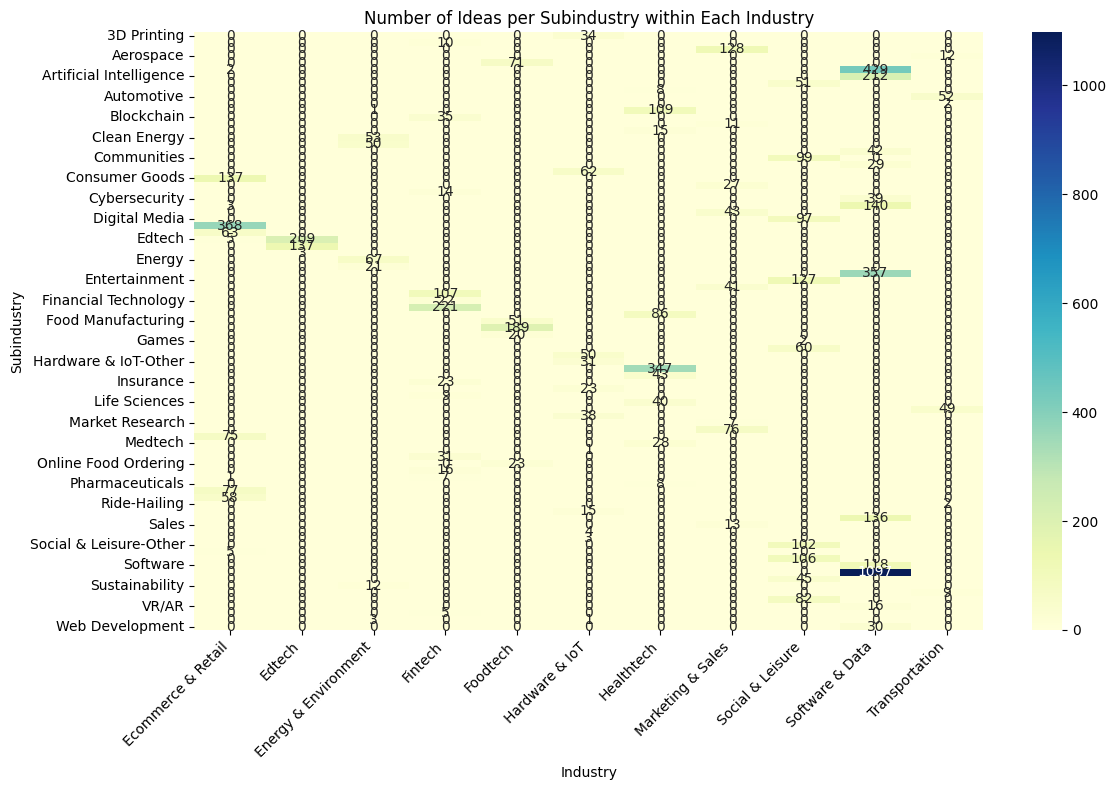

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming zigzag_df is your DataFrame with assigned industries and subindustries

# Create a pivot table
pivot_table = zigzag_df.pivot_table(index='assigned_subindustry_name',
                                    columns='assigned_industry_name',
                                    aggfunc='size',
                                    fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Ideas per Subindustry within Each Industry')
plt.ylabel('Subindustry')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


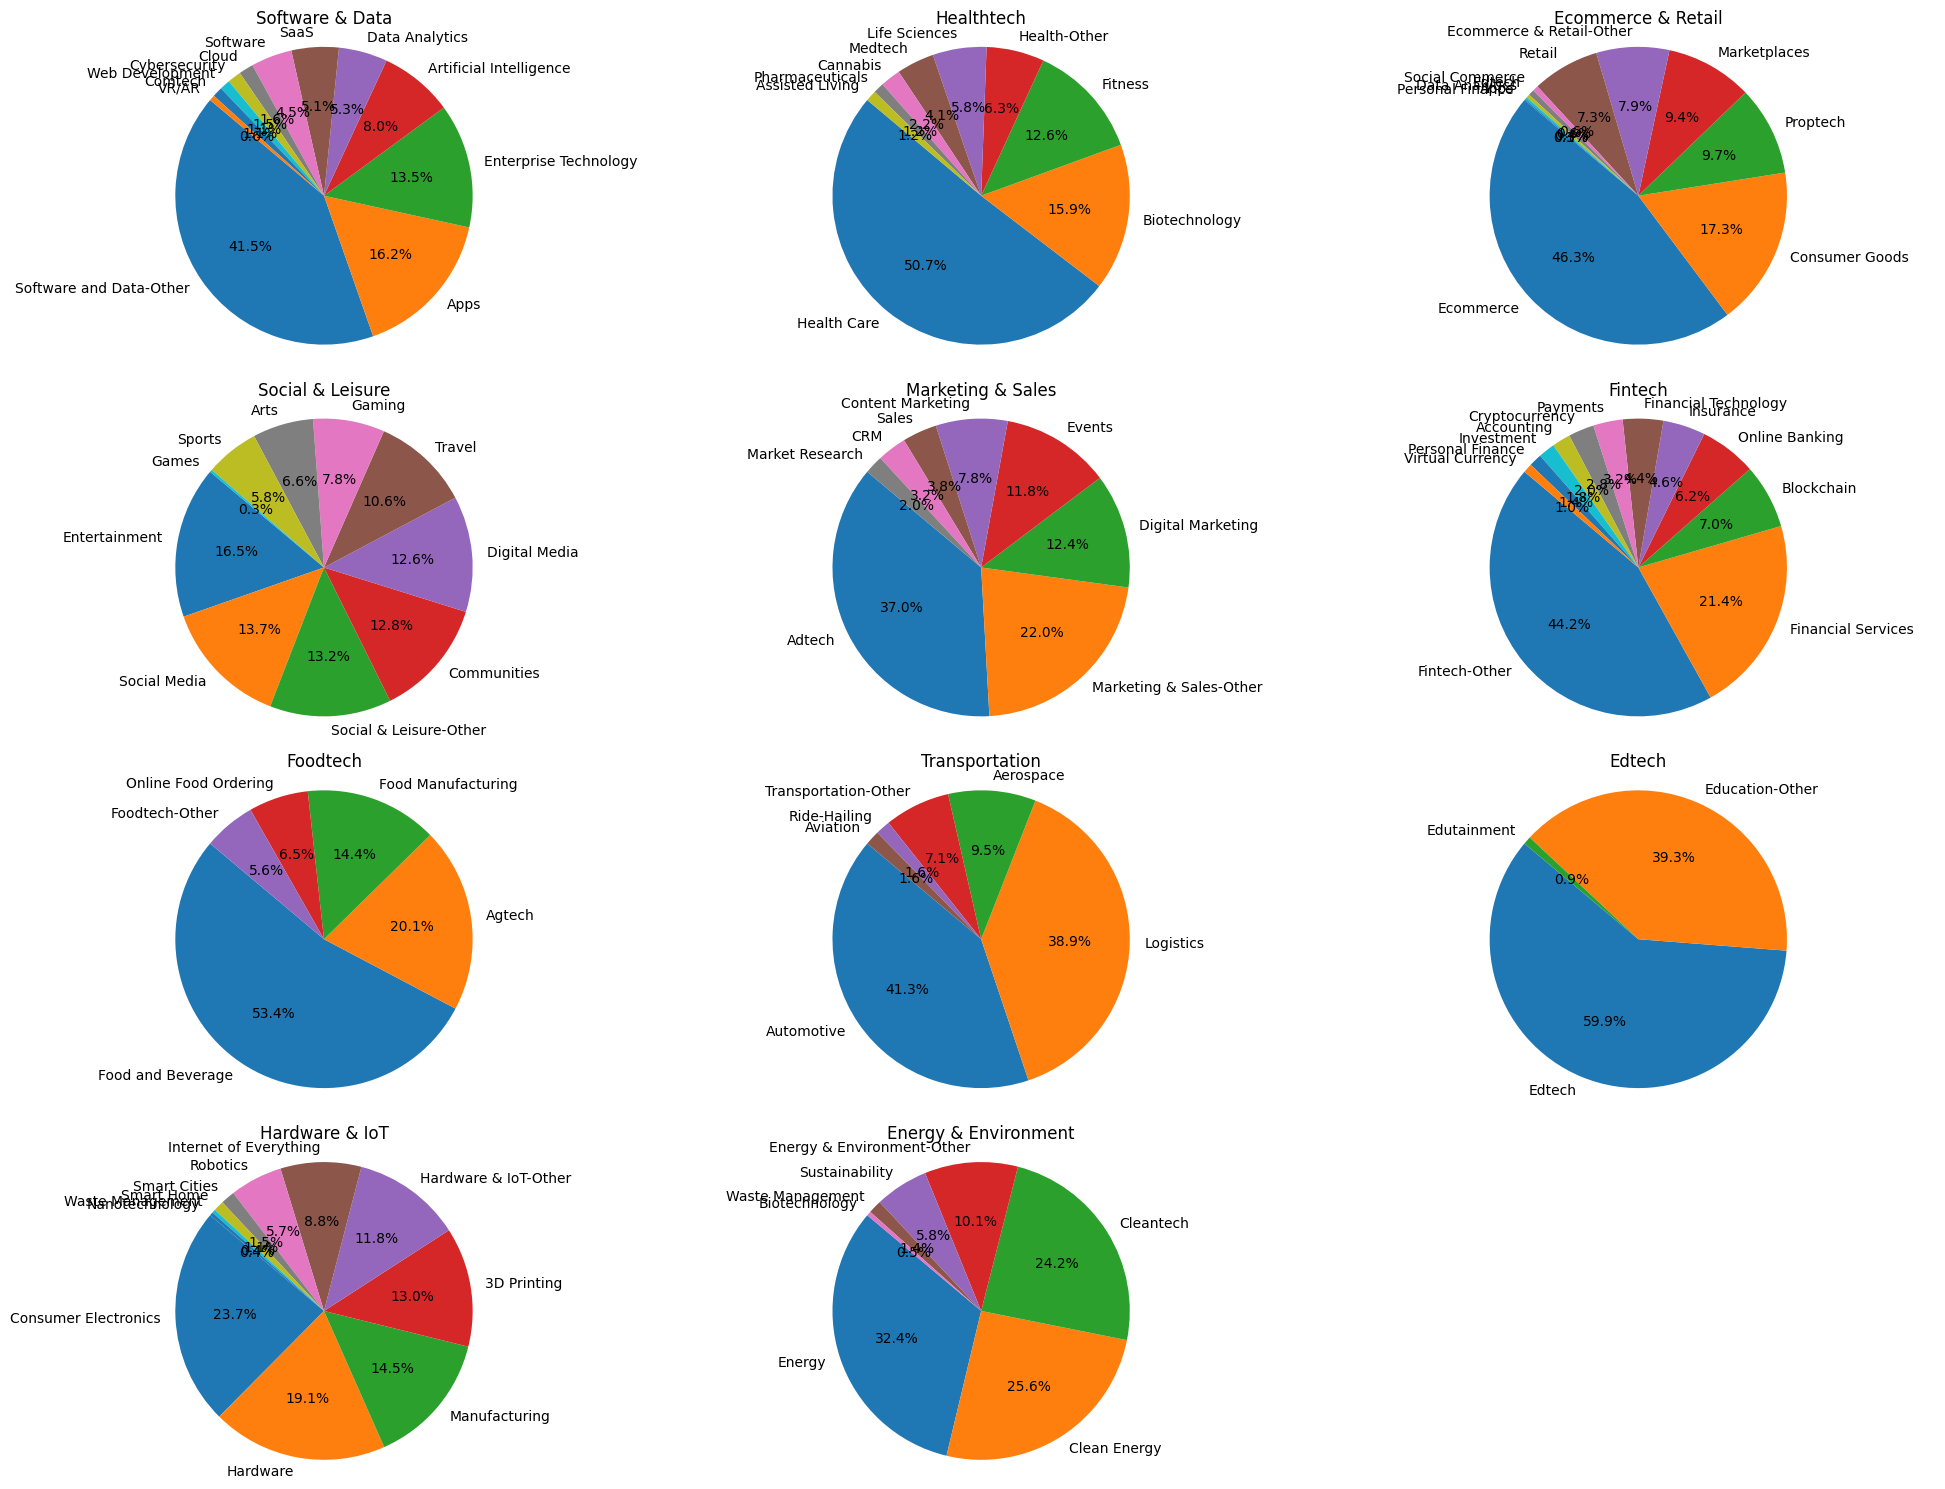

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming zigzag_df contains 'assigned_industry_name' and 'assigned_subindustry_name' columns

# Getting unique industries
industries = zigzag_df['assigned_industry_name'].unique()

# Set up the figure size dynamically based on the number of industries
plt.figure(figsize=(20, 15))

# Plotting a pie chart for each industry
for i, industry in enumerate(industries):
    # Creating a subplot for each industry
    plt.subplot(4, 3, i+1)  # Adjust the grid size if needed

    # Filter the dataframe for the current industry
    current_industry_df = zigzag_df[zigzag_df['assigned_industry_name'] == industry]

    # Count the occurrences of each subindustry within the current industry
    subindustry_counts = current_industry_df['assigned_subindustry_name'].value_counts()

    # Plotting
    plt.pie(subindustry_counts, labels=subindustry_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(industry)

plt.tight_layout()
plt.show()


/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


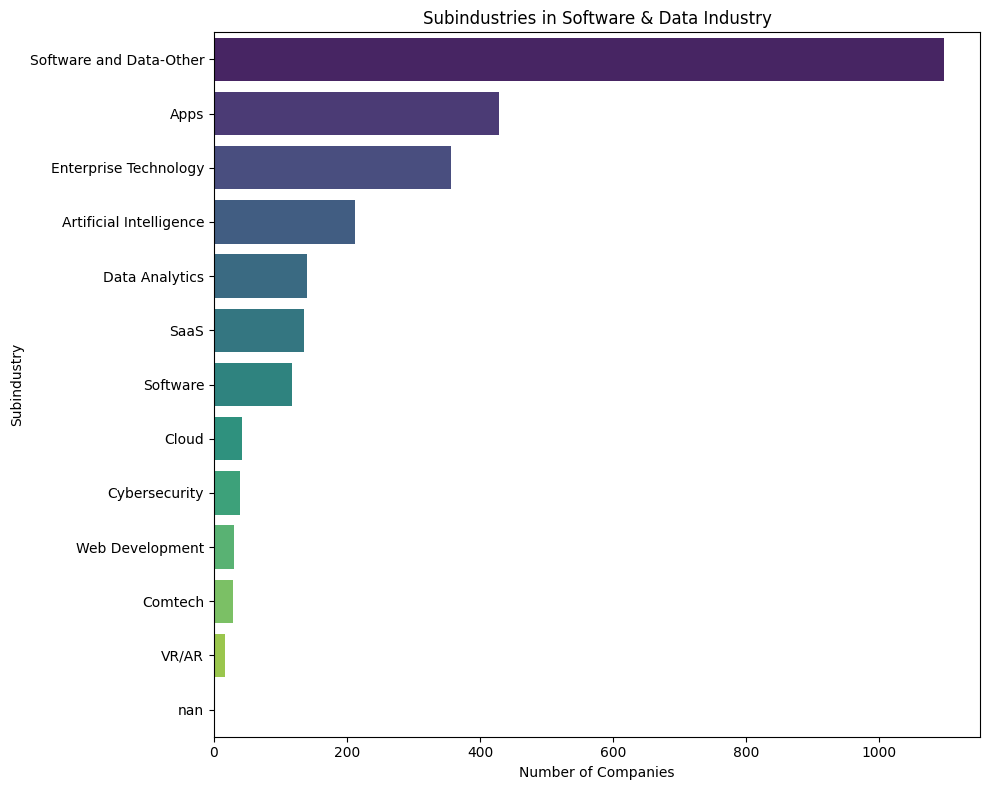

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


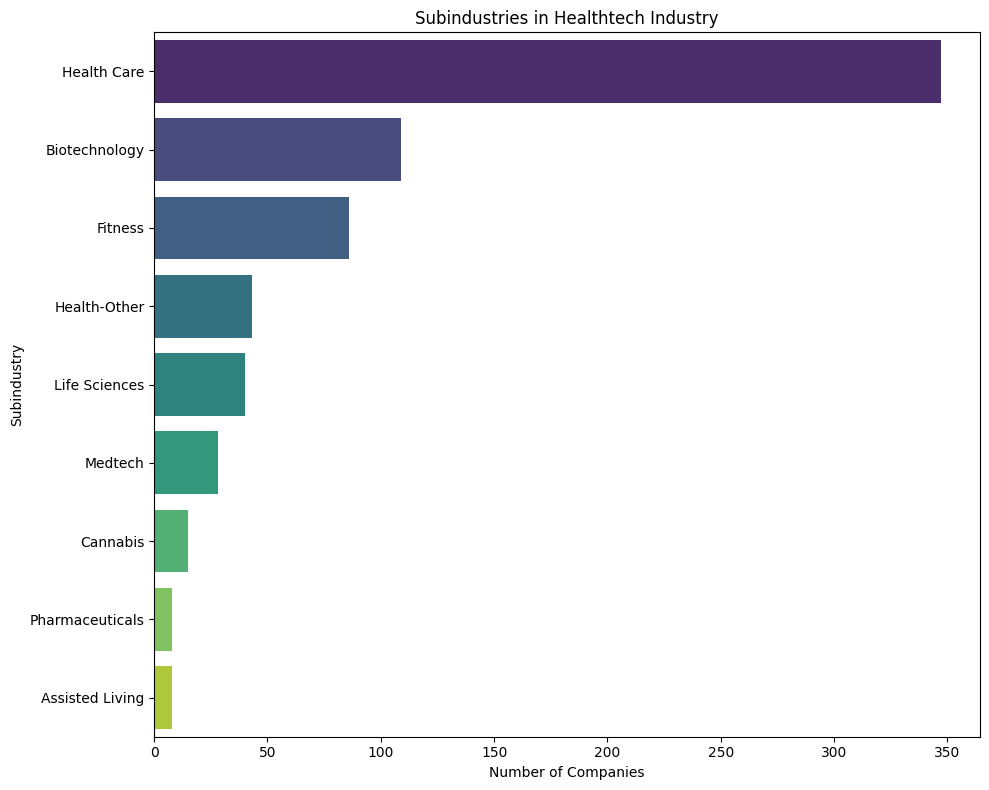

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


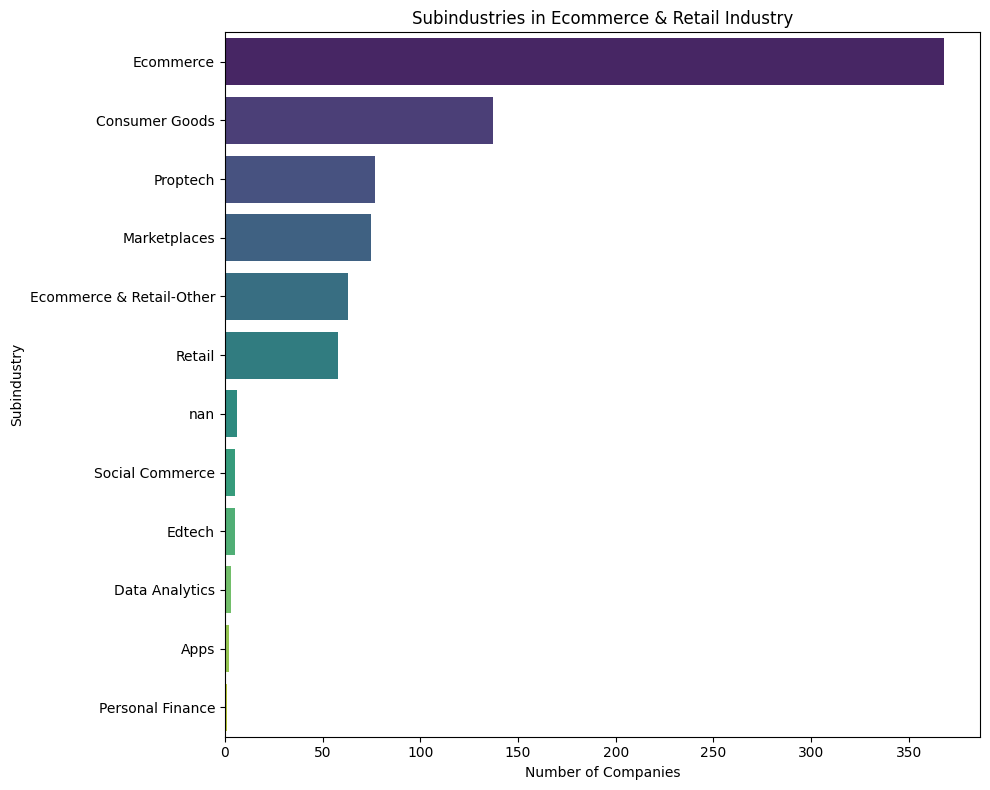

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


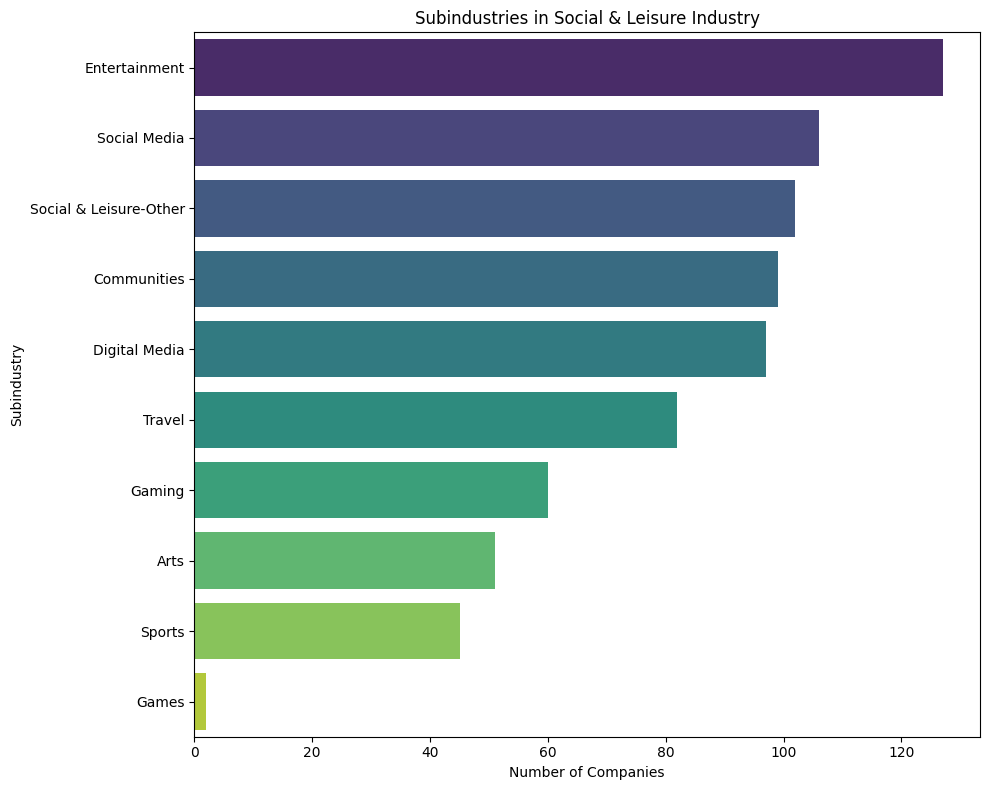

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


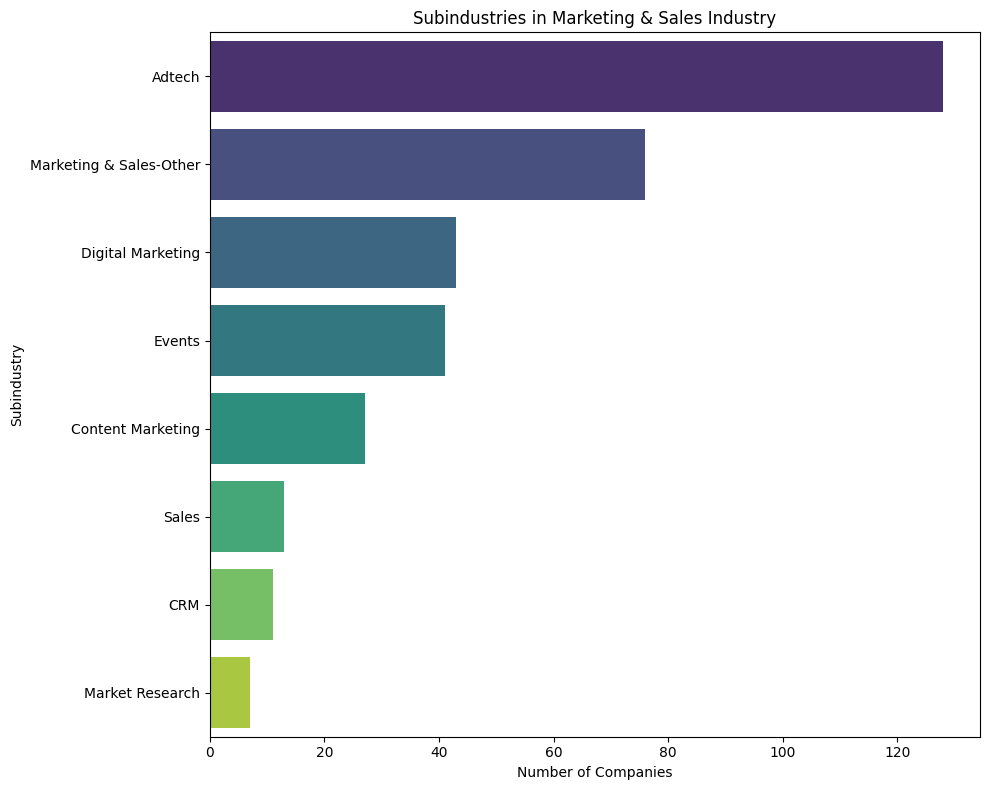

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


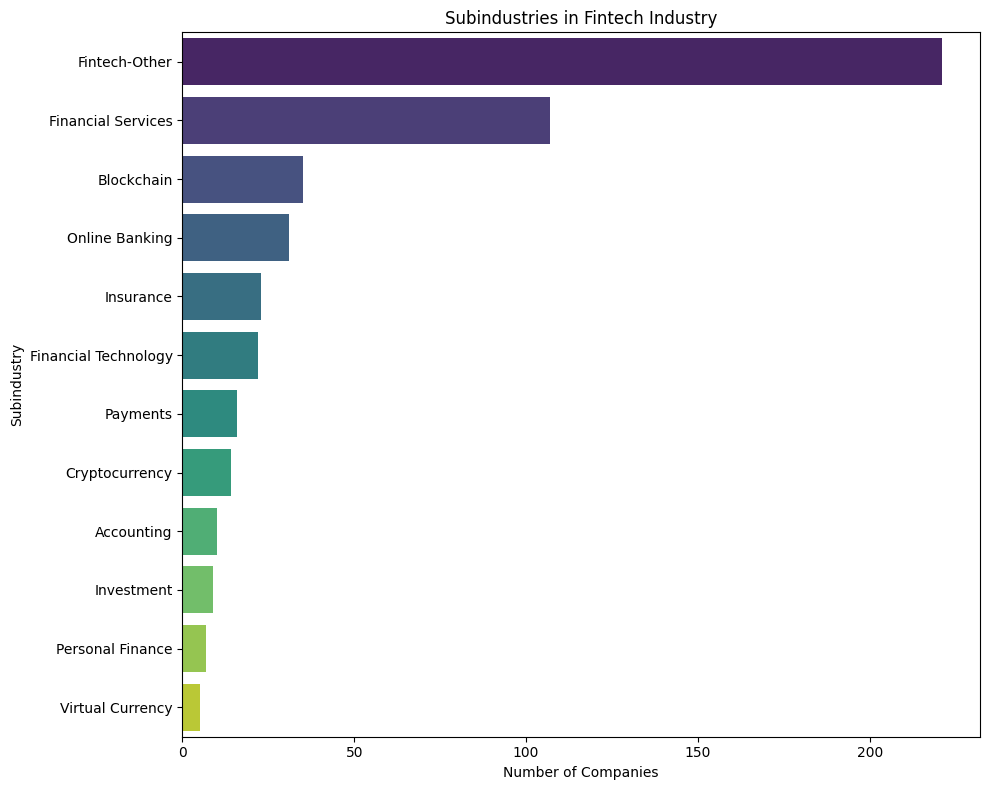

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


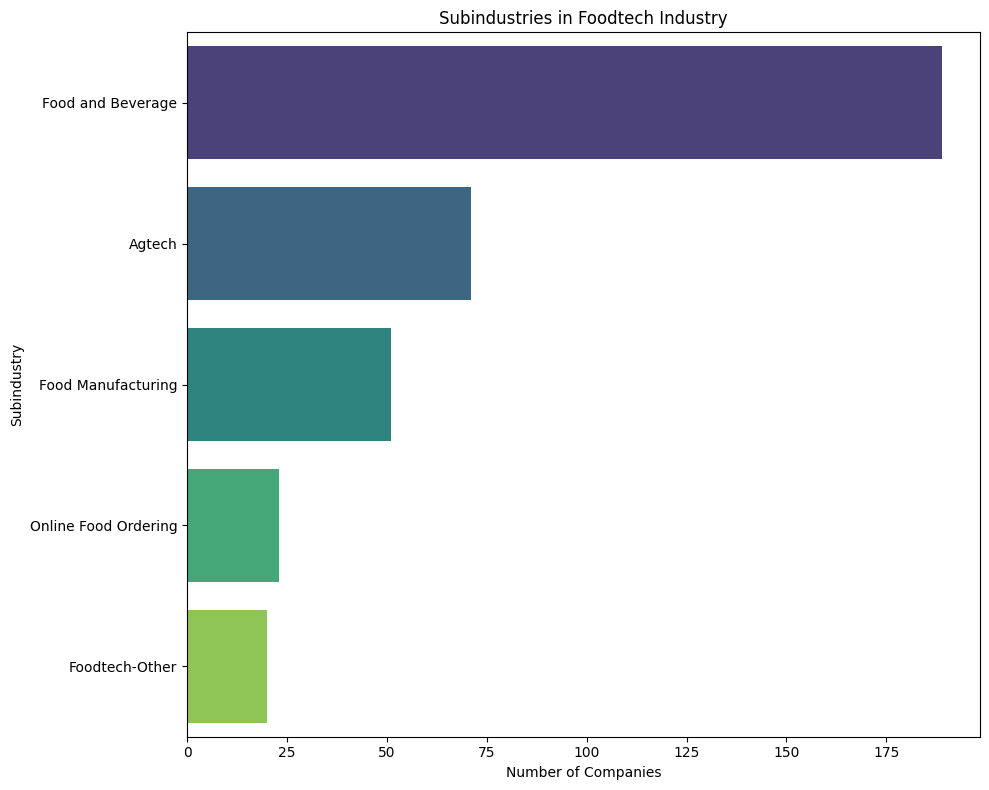

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


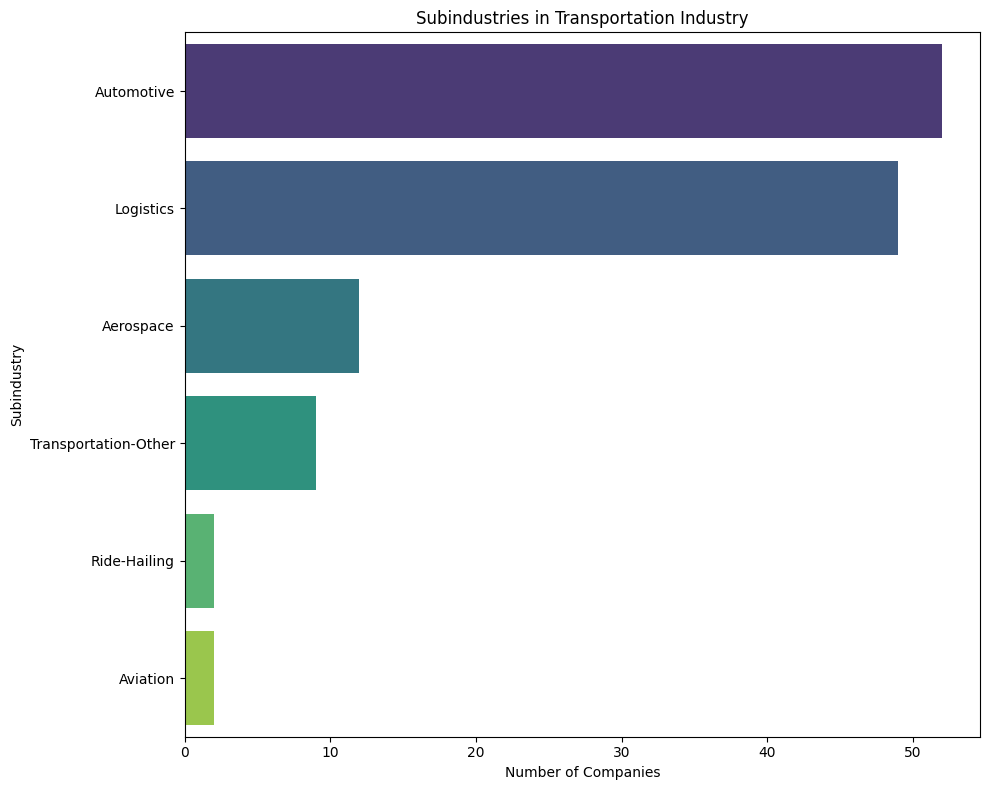

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


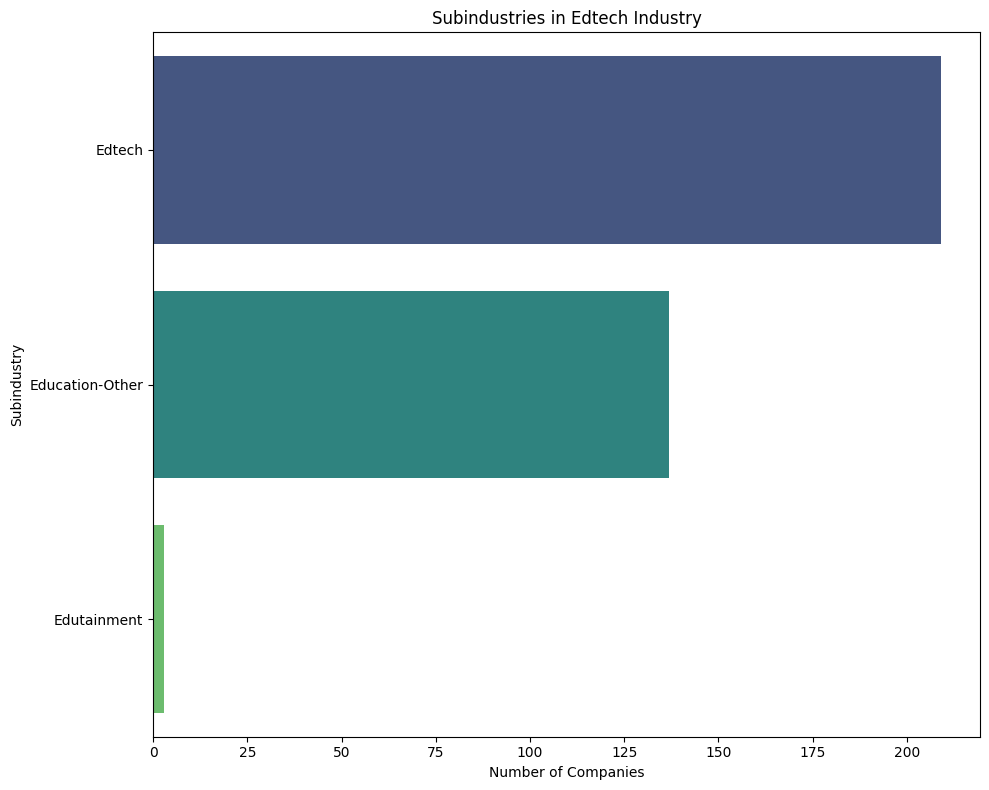

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


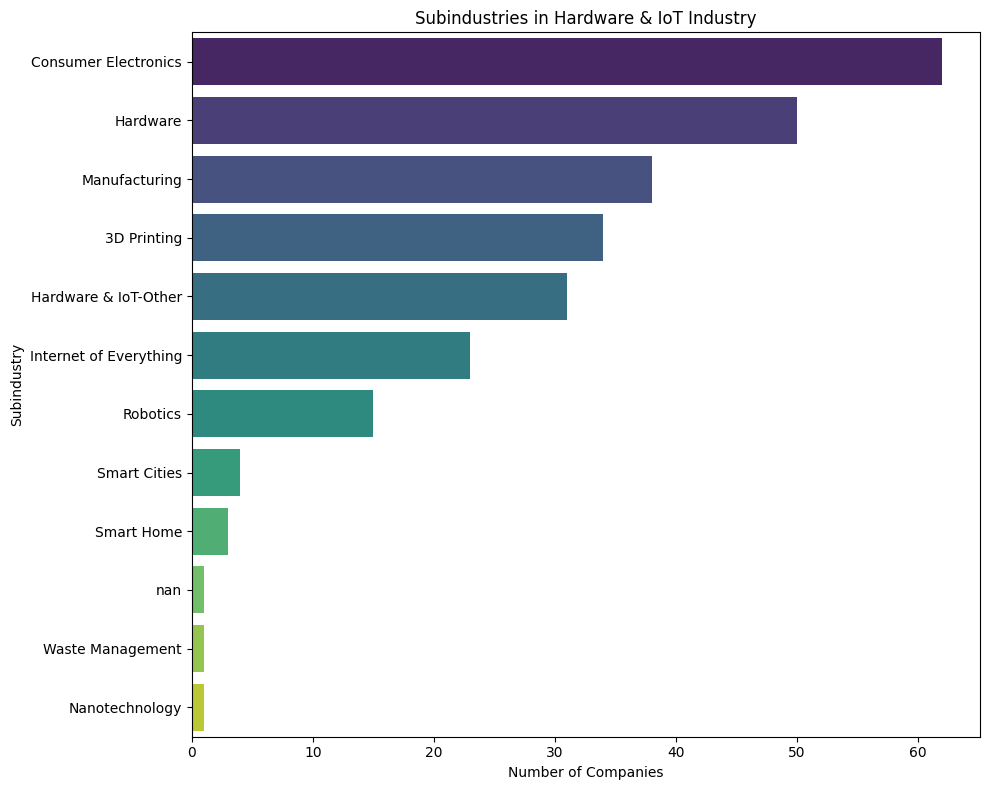

/var/folders/43/z2_sdmhj1y3_2qsrhv9glv600000gn/T/ipykernel_16744/2750095852.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')


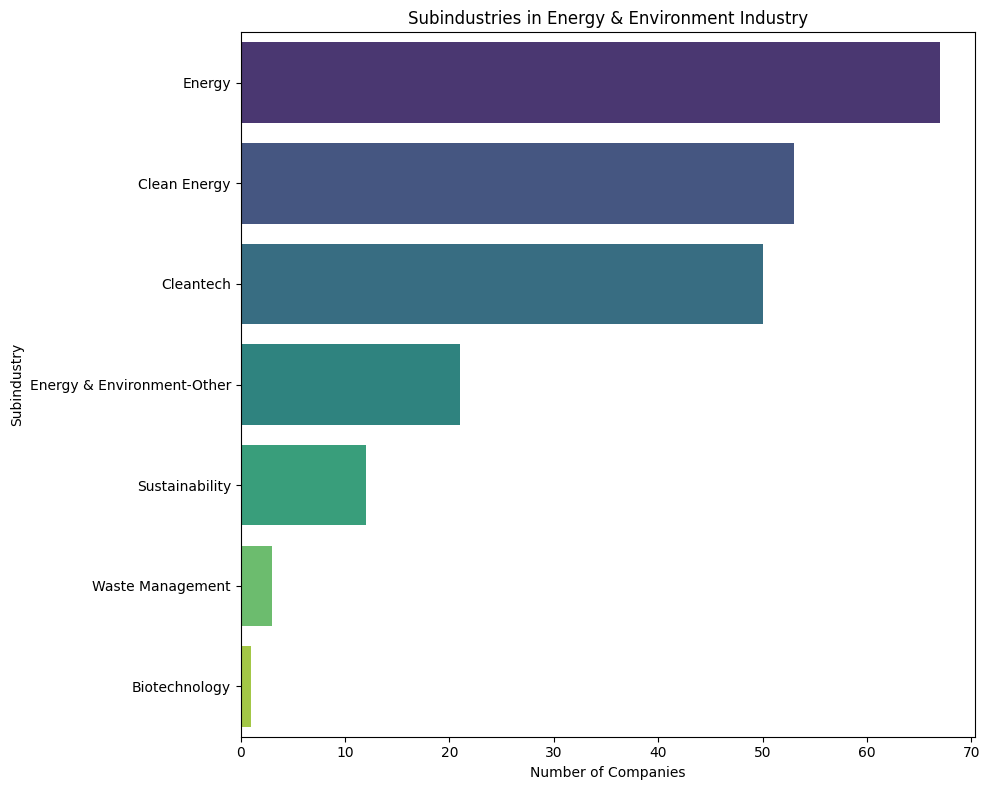

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'zigzag_df' is your DataFrame that now includes 'assigned_industry_name' and 'assigned_subindustry_name' columns

# First, let's ensure that 'assigned_subindustry_name' is a string to avoid any errors during plotting
zigzag_df['assigned_subindustry_name'] = zigzag_df['assigned_subindustry_name'].astype(str)

# Get unique industries
industries = zigzag_df['assigned_industry_name'].unique()

for industry in industries:
    # Filter DataFrame for the current industry
    industry_df = zigzag_df[zigzag_df['assigned_industry_name'] == industry]

    # Count the number of occurrences of each subindustry
    subindustry_counts = industry_df['assigned_subindustry_name'].value_counts().reset_index()
    subindustry_counts.columns = ['Subindustry', 'Count']

    # Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Count', y='Subindustry', data=subindustry_counts, palette='viridis')
    plt.title(f'Subindustries in {industry} Industry')
    plt.xlabel('Number of Companies')
    plt.ylabel('Subindustry')
    plt.tight_layout()
    plt.show()



In [ ]:
zigzag_df = zigzag_df.dropna(subset = ['idea_description'])

In [ ]:
# Function to clean up the 'canvas_revenue_streams' column
def clean_canvas_customer_segments(text):
    if pd.isnull(text):
        return ""
    # Remove hyphens and new lines, then strip leading and trailing spaces
    return text.replace('-', '').replace('\n', ' ').strip()

# Clean the 'canvas_revenue_streams' column
zigzag_df['canvas_customer_segments'] = zigzag_df['canvas_customer_segments'].apply(clean_canvas_customer_segments)

print(zigzag_df[['canvas_customer_segments']].head())


                            canvas_customer_segments
0  Women of all age groups  Organized individuals...
1  Corporate event organizers  Concert organizers...
2  Mechanical watch wearers  Techsavvy adults  Fi...
3  Large corporates  Government organizations  Pr...
4  Job seekers across all industries Graduates lo...


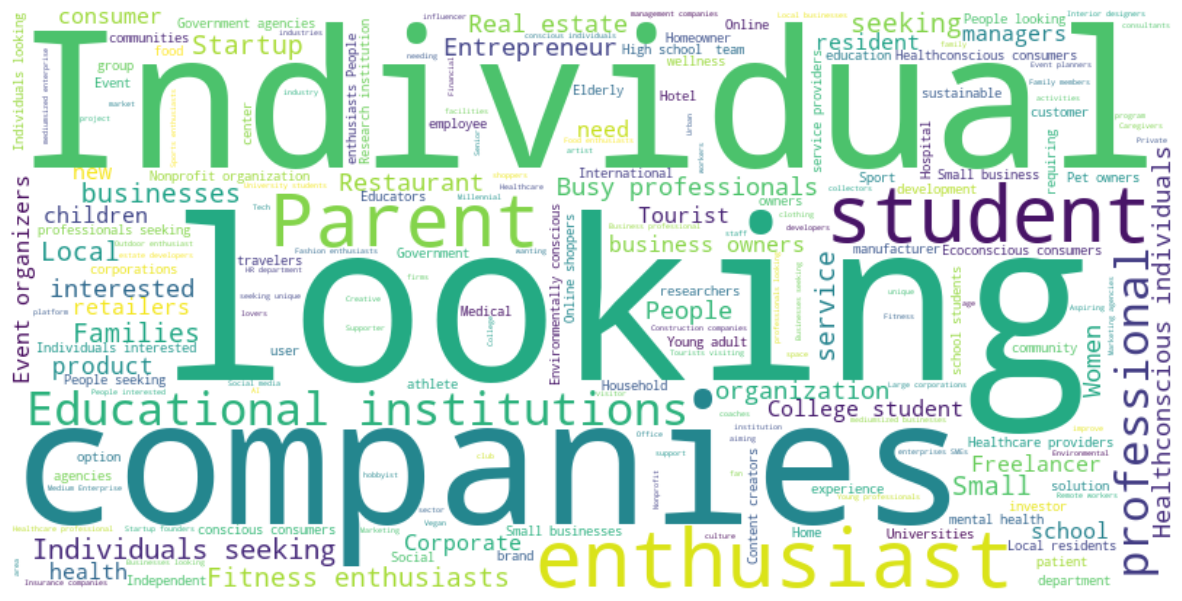

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the entries in the canvas_revenue_streams column into a single text string
# Here we assume that 'canvas_revenue_streams' has already been cleaned
all_revenue_streams = ' '.join(zigzag_df['canvas_customer_segments'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_revenue_streams)

# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import pandas as pd

# Load the zigzag_df dataset from CSV file
#zigzag_df = pd.read_csv('/path/to/2024-03-13_export_zigzag.csv')

# Keywords or phrases for each category
# Keywords for B2B (Business-to-Business)
b2b_keywords = [
    "Enterprise", "Wholesale", "SaaS", "Licensing", "Corporations",
    "Partnerships", "Bulk sales", "Supply chain", "Procurement", "Industrial",
    "B2B", "Commercial clients", "Resellers", "Distributors", "Business clients",
    "Trade sales", "Corporate", "Professional services", "B2B ecommerce", "Agencies"
]

# Keywords for B2C (Business-to-Consumer)
b2c_keywords = [
    "Retail", "E-commerce", "Direct sales", "Online sales", "Consumer",
    "Marketplace", "B2C", "Subscription", "Merchandising", "Physical store",
    "Digital products", "App sales", "Personal services", "Consumer goods", "Online shopping",
    "users", "Direct", "Web store", "Mobile", "purchases"
]

# Keywords for D2C (Direct-to-Consumer)
d2c_keywords = [
    "D2C", "Online store", "Brand website", "E-store", "Direct shipping",
    "Consumer direct", "Manufacturer direct", "Direct online sales", "Subscription box", "Crowdfunding",
    "Social media sales", "Influencer sales", "Custom orders", "Personalized products", "Build-to-order",
    "E-commerce platform", "Direct retail", "Online marketplace", "Own brand retail", "Self-service portal"
]


# Function to categorize based on keywords
def categorize_sales_model(text):
    if pd.isnull(text):  # Check for NaN values
        return 'Unknown'  # or another appropriate default value
    text = text.lower()  # Convert to lowercase
    if any(phrase in text for phrase in b2b_keywords):
        return 'B2B'
    elif any(phrase in text for phrase in b2c_keywords):
        return 'B2C'
    elif any(phrase in text for phrase in d2c_keywords):
        return 'D2C'
    else:
        return 'Unknown2'

# Ensure the 'canvas_revenue_streams' column exists
if 'canvas_customer_segments' in zigzag_df.columns:
    # Apply the function to categorize each entry
    zigzag_df['sales_model'] = zigzag_df['canvas_customer_segments'].apply(categorize_sales_model)
else:
    print("'canvas_customer_segments' column not found in the dataset.")

# Show the first few rows to verify
print(zigzag_df[['canvas_customer_segments', 'sales_model']].head(100))


                             canvas_customer_segments sales_model
0   Women of all age groups  Organized individuals...    Unknown2
1   Corporate event organizers  Concert organizers...    Unknown2
2   Mechanical watch wearers  Techsavvy adults  Fi...    Unknown2
3   Large corporates  Government organizations  Pr...    Unknown2
4   Job seekers across all industries Graduates lo...    Unknown2
..                                                ...         ...
95  Solar power plant operators  Battery manufactu...    Unknown2
96  Manufacturing Companies  Supply Chain Consulta...    Unknown2
97  Women seeking personal health management  Wome...    Unknown2
98  UC Irvine students  Gym enthusiasts  Faculty a...    Unknown2
99  Fashionconscious consumers  People who struggl...    Unknown2

[100 rows x 2 columns]
